In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sma
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_percentage_error,
    mean_squared_error
)

plt.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

In [2]:
data = pd.read_csv("Capstone Projectt.csv")

In [3]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,...,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [4]:
df_cat=data.select_dtypes(exclude=np.number)
df_num=data.select_dtypes(include=np.number)
df_num.shape[1]
df_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [5]:
data.shape

(60428, 40)

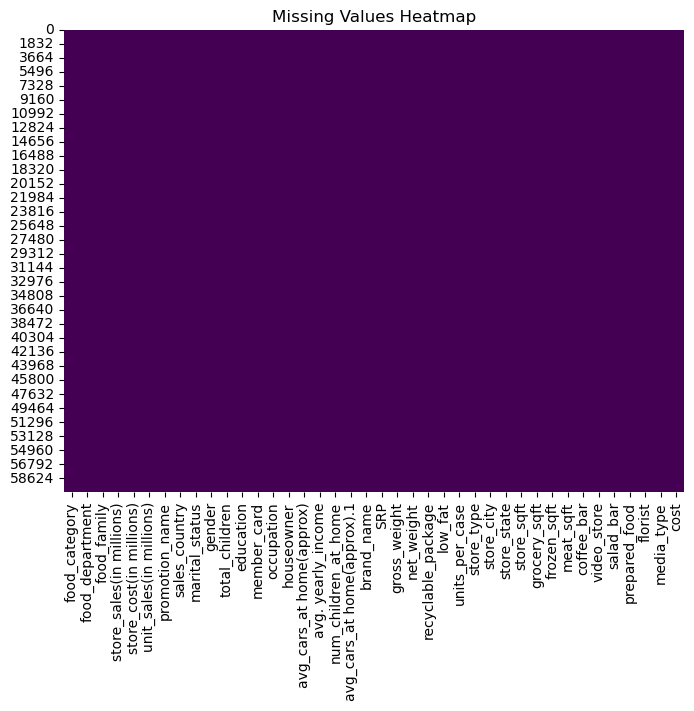

In [6]:
missing_values = data.isnull()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
usdata = data.query("sales_country == 'USA'")

In [8]:
usdata.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,...,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [9]:
usnum_cols=usdata.select_dtypes(include=np.number).columns.to_list()

In [10]:
usdf_cat=usdata.select_dtypes(exclude=np.number)
usdf_num=usdata.select_dtypes(include=np.number)
usdf_num.shape[1]
usdf_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [11]:
usdata.shape

(38892, 40)

In [12]:
usdf_num.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

# Normality test

Shapiro test

In [13]:
#we will consider age & Fare to perform this test because both are continous 

#since both are continous we will first check for parametric assumptions

In [14]:
# Hypothesis Formation
# NUll : Data is Normal / skew = 0 
# Altr : Data is Not Normal / skew != 0

In [15]:
alpha=0.05
for col in usdata.select_dtypes(include=np.number).columns:
    shapiro_result = stats.shapiro(usdata[col])
    print(col,':',shapiro_result,)
    if shapiro_result.pvalue < alpha :
        print('Rejects H0,Data is Not Normal\n')
    
    else:
        print('Fails to reject H0,Data is Normal\n') 
    

store_sales(in millions) : ShapiroResult(statistic=0.9604651927947998, pvalue=0.0)
Rejects H0,Data is Not Normal

store_cost(in millions) : ShapiroResult(statistic=0.9511649012565613, pvalue=0.0)
Rejects H0,Data is Not Normal

unit_sales(in millions) : ShapiroResult(statistic=0.8782147169113159, pvalue=0.0)
Rejects H0,Data is Not Normal

total_children : ShapiroResult(statistic=0.9288238883018494, pvalue=0.0)
Rejects H0,Data is Not Normal

avg_cars_at home(approx) : ShapiroResult(statistic=0.9122170209884644, pvalue=0.0)
Rejects H0,Data is Not Normal

num_children_at_home : ShapiroResult(statistic=0.6812231540679932, pvalue=0.0)
Rejects H0,Data is Not Normal

avg_cars_at home(approx).1 : ShapiroResult(statistic=0.9122170209884644, pvalue=0.0)
Rejects H0,Data is Not Normal

SRP : ShapiroResult(statistic=0.9713159203529358, pvalue=0.0)
Rejects H0,Data is Not Normal

gross_weight : ShapiroResult(statistic=0.9506967067718506, pvalue=0.0)
Rejects H0,Data is Not Normal

net_weight : ShapiroR

## Levene test

In [16]:
#Null : Data is having equal variance
#Alt : Data is not having equal variance

In [17]:
ind_columns = usdf_num.drop(columns='cost')

In [18]:
for col in ind_columns.columns:
    levene_result = stats.levene(ind_columns[col],usdata['cost'])
    print(col,':',levene_result,'\n')
    if levene_result.pvalue < alpha :
        print('Rejects H0,Data is not having equal variance\n')
    
    else:
        print('Fails to reject H0,Data is having equal variance\n') 
    

store_sales(in millions) : LeveneResult(statistic=108140.32857380452, pvalue=0.0) 

Rejects H0,Data is not having equal variance

store_cost(in millions) : LeveneResult(statistic=125603.14950697578, pvalue=0.0) 

Rejects H0,Data is not having equal variance

unit_sales(in millions) : LeveneResult(statistic=131312.61708887594, pvalue=0.0) 

Rejects H0,Data is not having equal variance

total_children : LeveneResult(statistic=124251.0543903377, pvalue=0.0) 

Rejects H0,Data is not having equal variance

avg_cars_at home(approx) : LeveneResult(statistic=128053.81231863136, pvalue=0.0) 

Rejects H0,Data is not having equal variance

num_children_at_home : LeveneResult(statistic=128282.77760667265, pvalue=0.0) 

Rejects H0,Data is not having equal variance

avg_cars_at home(approx).1 : LeveneResult(statistic=128053.81231863136, pvalue=0.0) 

Rejects H0,Data is not having equal variance

SRP : LeveneResult(statistic=129478.2702883939, pvalue=0.0) 

Rejects H0,Data is not having equal varianc

In [19]:
#we assume data is not normal and having unequal variance and we are proceed to perform non-paramteric test 

In [20]:
#performing spearman R correlation for continous vs continous

# categorial vs continous

In [21]:
usdf_num.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [22]:
usdf_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [23]:
usdf_cat_list=usdf_cat['food_category'].unique().tolist()

### Shapiro test for categorical variable

In [24]:
shapiro_food_category={}
for col in usdf_cat_list:
    shapiro_score=stats.shapiro(usdata[usdata['food_category']==col]['cost'])
    shapiro_food_category[col]=shapiro_score

In [25]:
shapiro_food_category

{'Breakfast Foods': ShapiroResult(statistic=0.9357995986938477, pvalue=8.516080375819946e-23),
 'Bread': ShapiroResult(statistic=0.9314651489257812, pvalue=1.1307451436081289e-22),
 'Canned Shrimp': ShapiroResult(statistic=0.9147725105285645, pvalue=1.8876321519201156e-06),
 'Baking Goods': ShapiroResult(statistic=0.9418649673461914, pvalue=1.1682883088868196e-21),
 'Vegetables': ShapiroResult(statistic=0.9302047491073608, pvalue=9.96323208134945e-43),
 'Frozen Desserts': ShapiroResult(statistic=0.934208869934082, pvalue=5.023336674359265e-20),
 'Candy': ShapiroResult(statistic=0.9323855042457581, pvalue=1.5386289638870834e-20),
 'Snack Foods': ShapiroResult(statistic=0.9312920570373535, pvalue=3.2547959430872526e-41),
 'Dairy': ShapiroResult(statistic=0.9332757592201233, pvalue=1.3349416959520049e-31),
 'Starchy Foods': ShapiroResult(statistic=0.9326212406158447, pvalue=2.166056971828706e-17),
 'Cleaning Supplies': ShapiroResult(statistic=0.9475128054618835, pvalue=4.845750536941473e-

In [26]:
shapiro_columns={}
for cat_column in usdf_cat.columns.to_list():
    usdf_cat_list=usdf_cat[cat_column].unique().tolist()
    for col in usdf_cat_list:
        shapiro_score=stats.shapiro(usdata[usdata[cat_column]==col]['cost'])
        shapiro_columns[cat_column,col]=shapiro_score

In [27]:
shapiro_columns

{('food_category',
  'Breakfast Foods'): ShapiroResult(statistic=0.9357995986938477, pvalue=8.516080375819946e-23),
 ('food_category',
  'Bread'): ShapiroResult(statistic=0.9314651489257812, pvalue=1.1307451436081289e-22),
 ('food_category',
  'Canned Shrimp'): ShapiroResult(statistic=0.9147725105285645, pvalue=1.8876321519201156e-06),
 ('food_category',
  'Baking Goods'): ShapiroResult(statistic=0.9418649673461914, pvalue=1.1682883088868196e-21),
 ('food_category',
  'Vegetables'): ShapiroResult(statistic=0.9302047491073608, pvalue=9.96323208134945e-43),
 ('food_category',
  'Frozen Desserts'): ShapiroResult(statistic=0.934208869934082, pvalue=5.023336674359265e-20),
 ('food_category',
  'Candy'): ShapiroResult(statistic=0.9323855042457581, pvalue=1.5386289638870834e-20),
 ('food_category',
  'Snack Foods'): ShapiroResult(statistic=0.9312920570373535, pvalue=3.2547959430872526e-41),
 ('food_category',
  'Dairy'): ShapiroResult(statistic=0.9332757592201233, pvalue=1.3349416959520049e-3

In [28]:
for i in shapiro_columns:
    if i.values(pvalue) < alpha :
            print(i[0])
            print('Rejects H0,Data is not having equal variance\n')

    else:
            print(i[0])
            print('Fails to reject H0,Data is having equal variance\n') 

AttributeError: 'tuple' object has no attribute 'values'

#Since every pvalue is less than 0.05 ,we reject H0 concluding that data is not normal,Hence we are going to perform Non-Parametric test i.e Krusal value test

#To test whether the variable is significant

In [32]:
shapiro_columns={}
for cat_column in usdf_cat.columns.to_list():
    usdf_cat_list=usdf_cat[cat_column].unique().tolist()
    for col in usdf_cat_list:
        kruskal_score=stats.kruskal(usdata[usdata[cat_column]==col]['cost'])
        shapiro_columns[cat_column,col]=shapiro_score

ValueError: Need at least two groups in stats.kruskal()

In [33]:
tu=()
for col in usdf_cat.columns.to_list()():
    
    tu.append(usdata[cat]==column)
    stats.kruskal(tuple)



TypeError: 'list' object is not callable

In [34]:
d={}
for cat_column in usdf_cat.columns.to_list():
    categories = usdata[cat_column].unique()  # Get unique categories

    # Create an empty list to store data for each category
    data_for_categories = []

    # Loop through each category and extract the data
    for category in categories:
        data_for_category = usdata[usdata[cat_column] == category]['cost'] 
        d[usdata[cat_column]]=data_for_category
        kruskal_score= stats.kruskal(d)
print(kruskal_score)

TypeError: unhashable type: 'Series'

In [ ]:
a

### Spearman

In [31]:
usdf_num.corr(method='spearman')

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.965981,0.473655,0.066526,-0.003693,0.010709,-0.003693,0.851147,0.044496,0.040241,...,0.003827,-0.007700,0.045491,0.045491,-0.042621,0.012497,0.031395,0.031395,0.033088,-0.002699
store_cost(in millions),0.965981,1.000000,0.456373,0.062693,-0.005350,0.007972,-0.005350,0.822765,0.041941,0.038002,...,0.005763,-0.005586,0.046523,0.046523,-0.041638,0.013737,0.032781,0.032781,0.033594,-0.004210
unit_sales(in millions),0.473655,0.456373,1.000000,0.148942,0.016366,0.042367,0.016366,-0.005317,0.000468,-0.000013,...,0.006187,-0.011400,0.063783,0.063783,-0.067840,0.016399,0.040630,0.040630,0.044452,-0.014644
total_children,0.066526,0.062693,0.148942,1.000000,0.097591,0.313749,0.097591,-0.000559,-0.000373,-0.000460,...,0.000880,0.013799,-0.030452,-0.030452,-0.001229,-0.014052,-0.019444,-0.019444,-0.007491,-0.002957
avg_cars_at home(approx),-0.003693,-0.005350,0.016366,0.097591,1.000000,0.130451,1.000000,-0.010407,0.007328,0.006862,...,-0.005456,-0.010425,-0.017385,-0.017385,-0.009426,0.011969,-0.014685,-0.014685,-0.013268,0.025287
num_children_at_home,0.010709,0.007972,0.042367,0.313749,0.130451,1.000000,0.130451,-0.007821,0.001196,0.000886,...,0.010083,0.011891,-0.024775,-0.024775,-0.030174,-0.038811,-0.049083,-0.049083,-0.017646,-0.001542
avg_cars_at home(approx).1,-0.003693,-0.005350,0.016366,0.097591,1.000000,0.130451,1.000000,-0.010407,0.007328,0.006862,...,-0.005456,-0.010425,-0.017385,-0.017385,-0.009426,0.011969,-0.014685,-0.014685,-0.013268,0.025287
SRP,0.851147,0.822765,-0.005317,-0.000559,-0.010407,-0.007821,-0.010407,1.000000,0.051659,0.047297,...,-0.001296,-0.000597,0.002260,0.002260,-0.001155,-0.003356,0.000261,0.000261,0.001329,0.008455
gross_weight,0.044496,0.041941,0.000468,-0.000373,0.007328,0.001196,0.007328,0.051659,1.000000,0.988859,...,-0.002306,-0.000852,-0.000826,-0.000826,-0.000356,0.003502,0.001721,0.001721,0.002687,-0.000173
net_weight,0.040241,0.038002,-0.000013,-0.000460,0.006862,0.000886,0.006862,0.047297,0.988859,1.000000,...,-0.001786,0.000357,-0.001396,-0.001396,-0.001185,0.002536,0.001174,0.001174,0.001109,0.000205


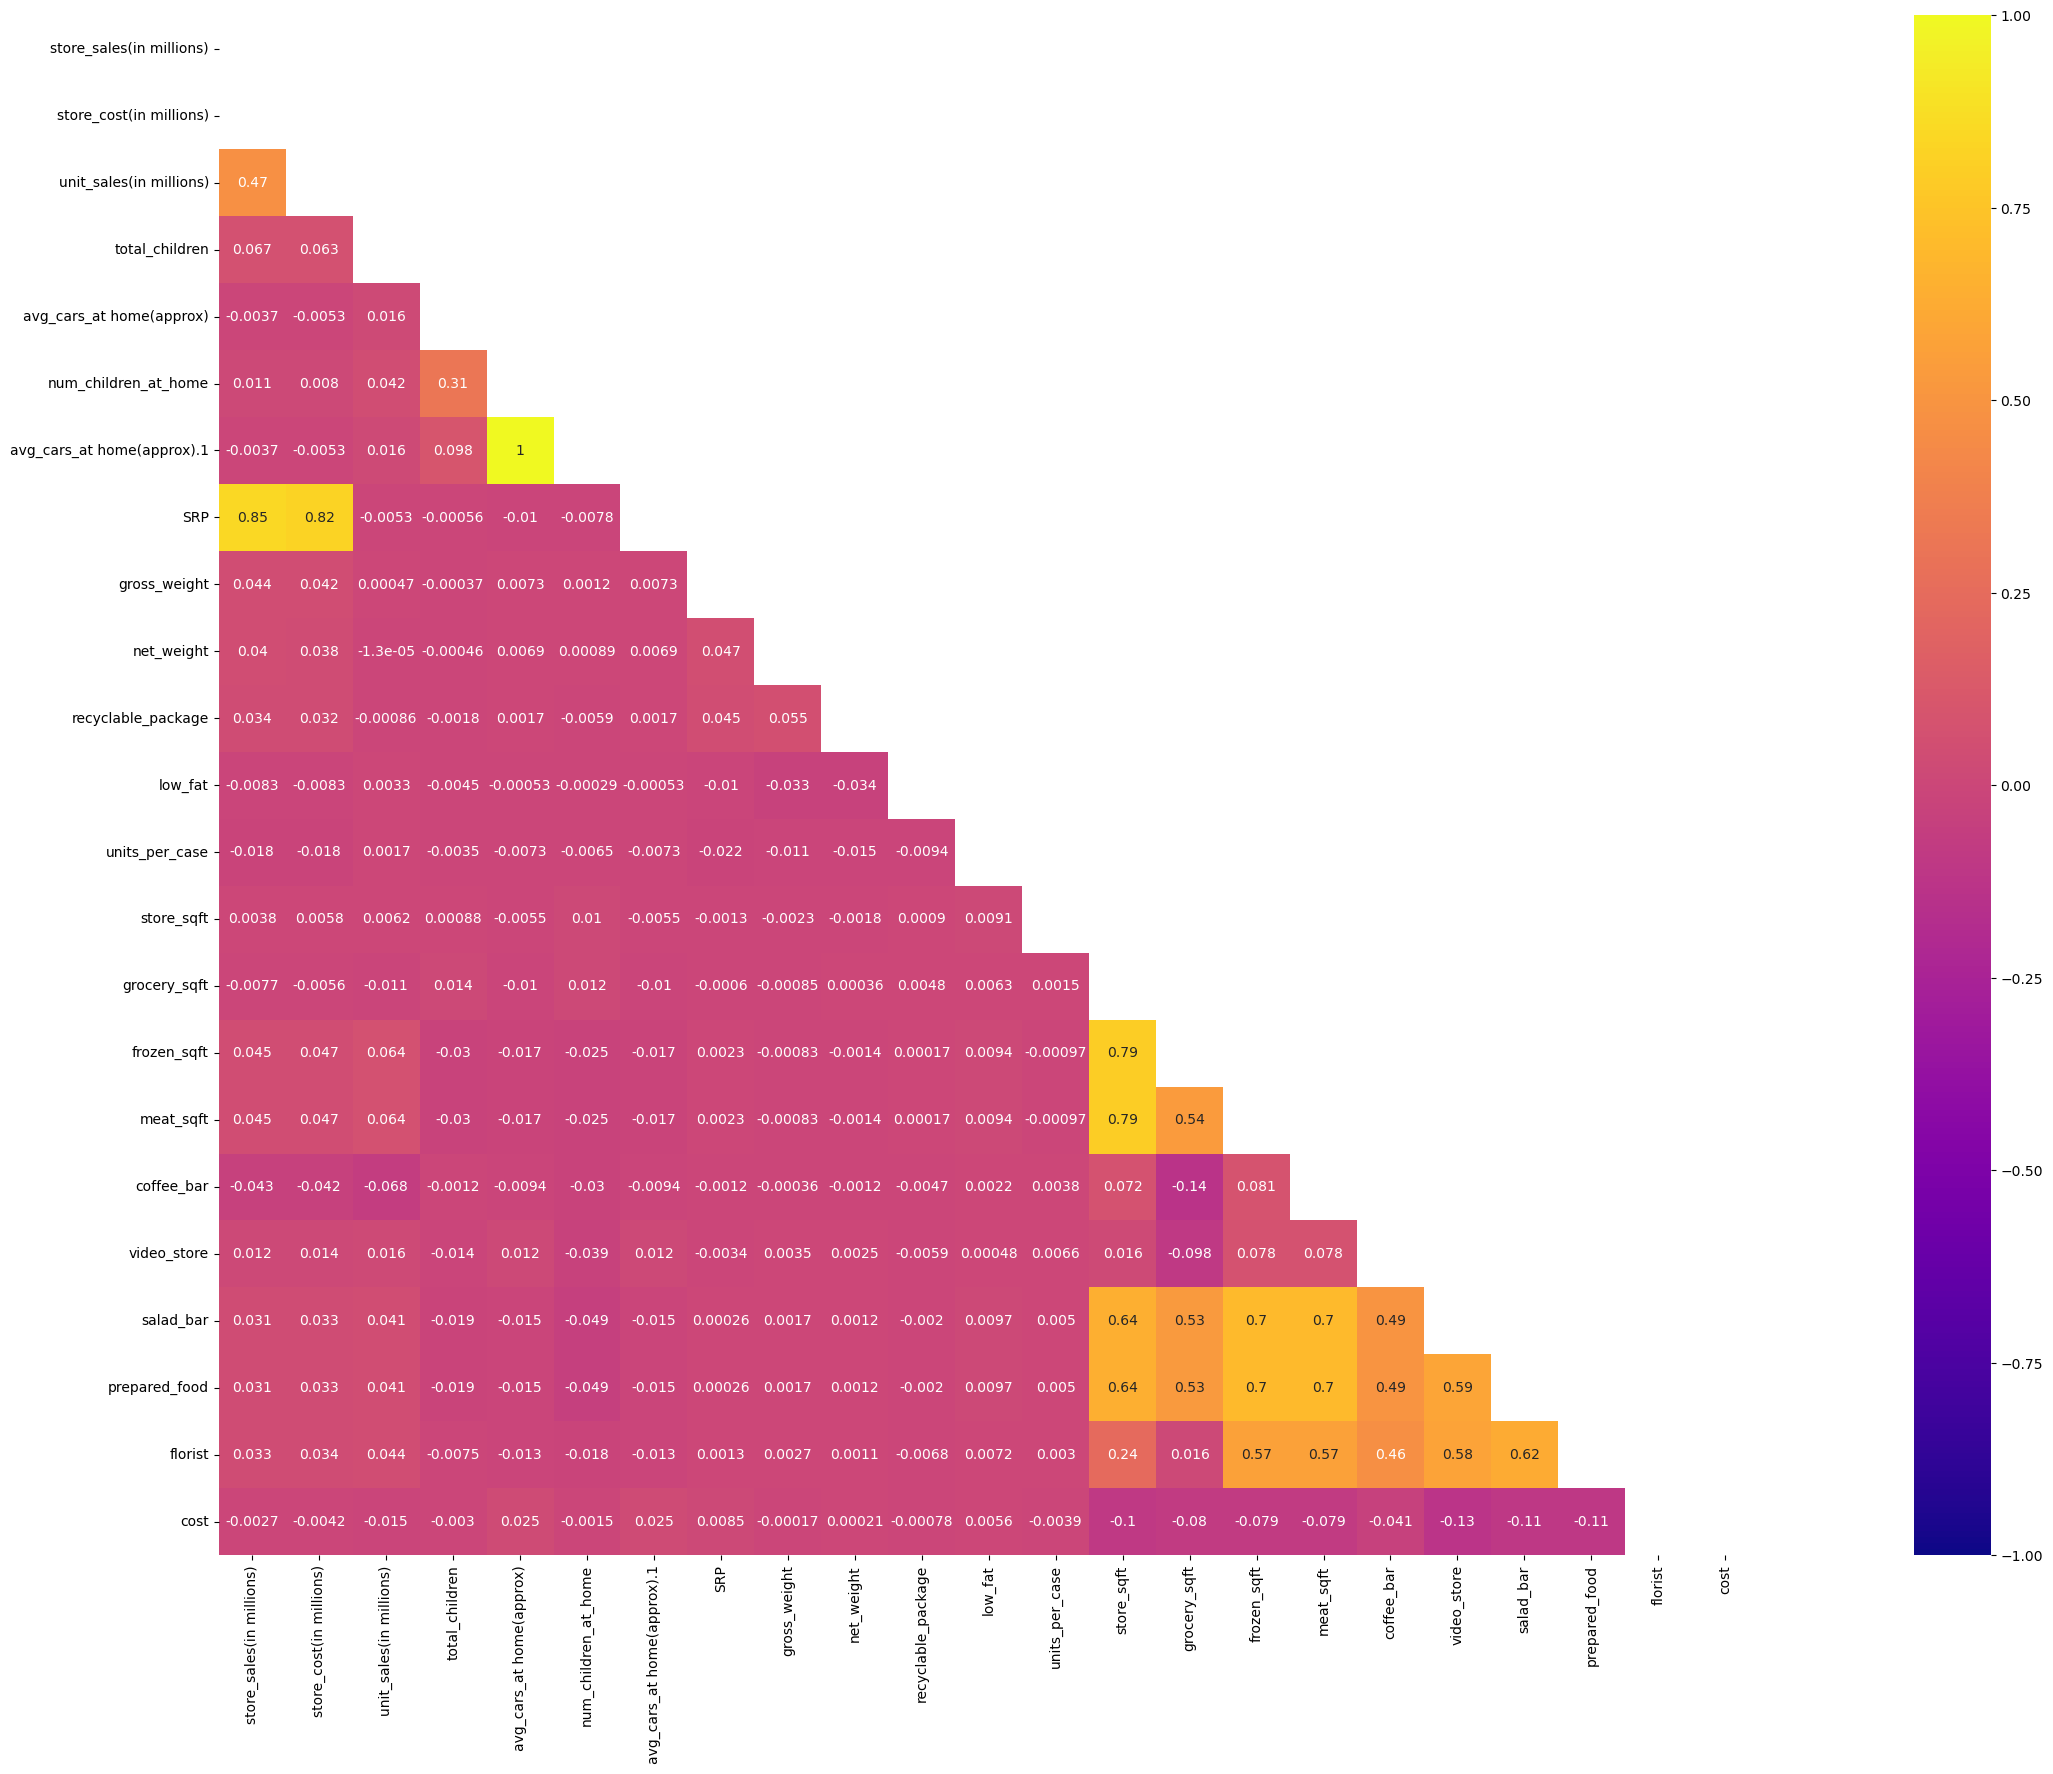

In [35]:
plt.figure(figsize=(40,20))
sns.heatmap(usdf_num.corr(method='spearman'),annot=True,mask=np.triu(usdf_num.corr(method='spearman'),k=-1),
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            square=True)
plt.show()

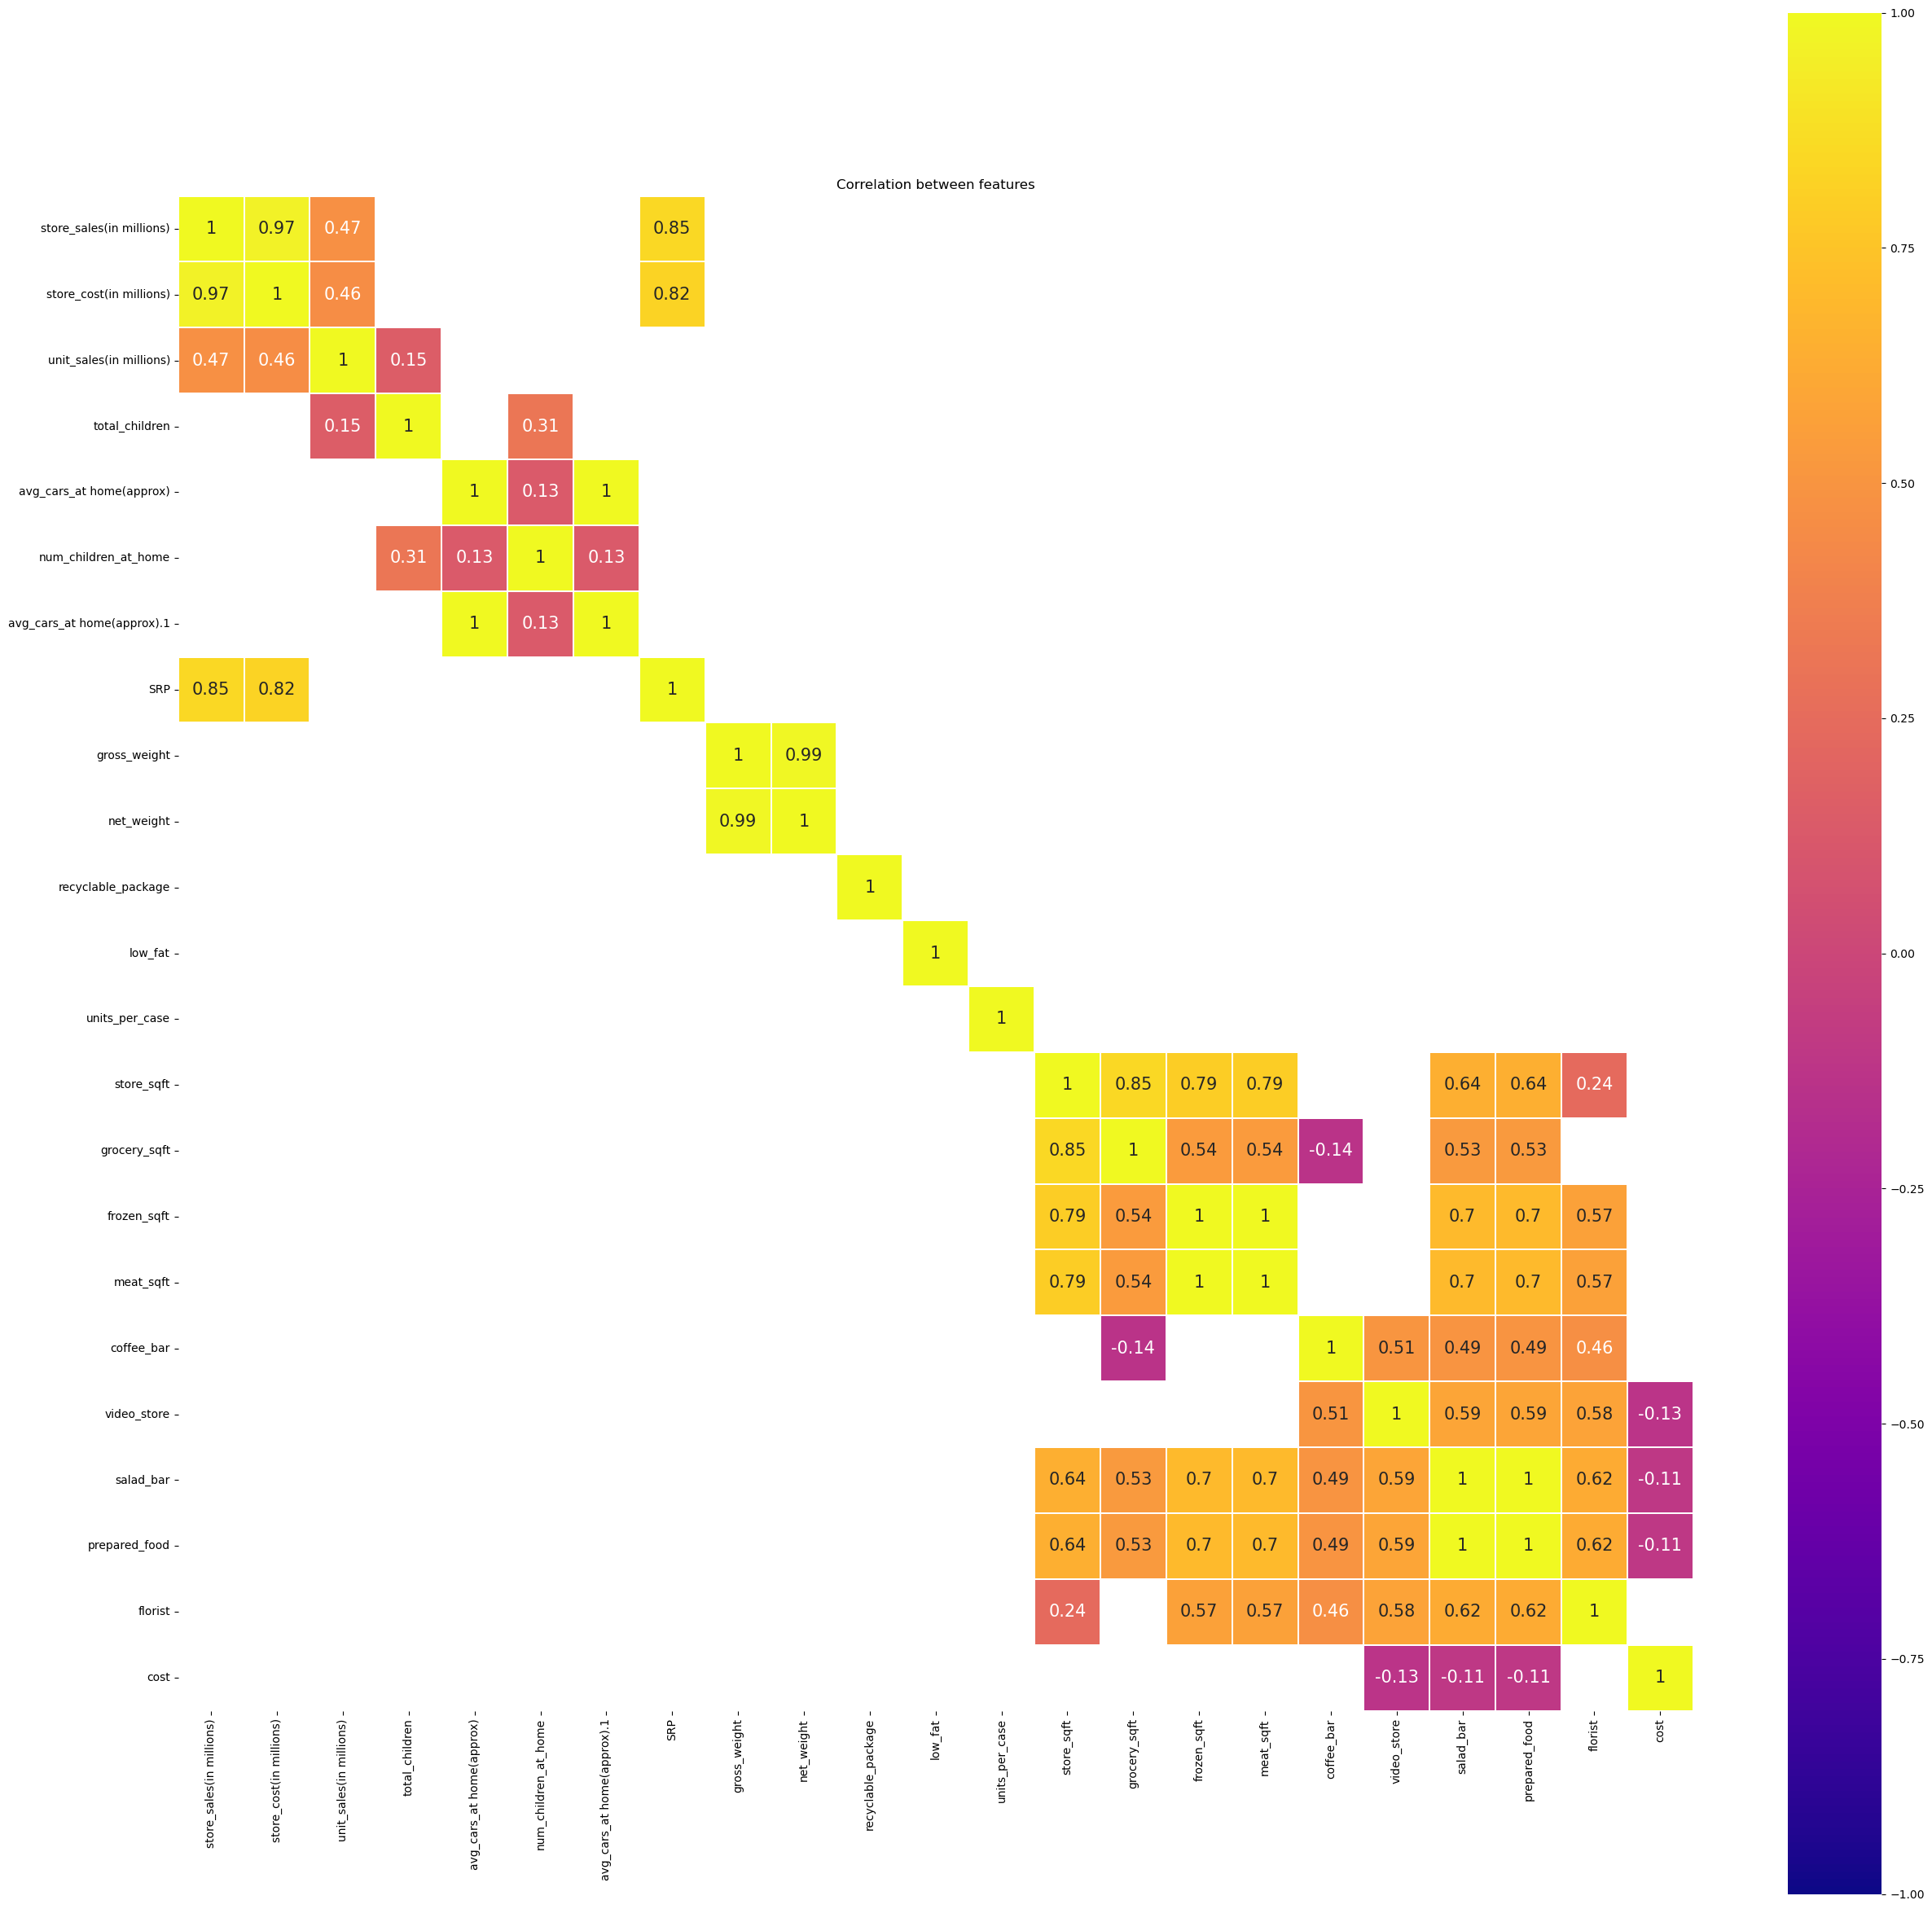

In [36]:
plt.figure(figsize=(30, 30))


sns.heatmap(usdf_num.corr(method='spearman')[(usdf_num.corr(method='spearman') >= 0.1) | (usdf_num.corr(method='spearman') <= -0.1)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

In [ ]:
#Categorical vs Continous

In [ ]:
#Testing whether the categorical variable is  Significant

In [37]:
#Standard Deviation
for col in usdf_num.columns:
    print(col,':',usdf_num[col].std())

store_sales(in millions) : 3.4607488391485592
store_cost(in millions) : 1.4475456124457855
unit_sales(in millions) : 0.8325458053727403
total_children : 1.4823378435234507
avg_cars_at home(approx) : 1.1330121616281168
num_children_at_home : 1.2931761259793704
avg_cars_at home(approx).1 : 1.1330121616281168
SRP : 0.932315961315665
gross_weight : 4.623928837496149
net_weight : 4.6858358469426395
recyclable_package : 0.4967492508316066
low_fat : 0.47848315001955155
units_per_case : 10.270945568399975
store_sqft : 5957.915400676024
grocery_sqft : 3739.762002415555
frozen_sqft : 1733.6375540174329
meat_sqft : 1155.5597004685628
coffee_bar : 0.4960806981826479
video_store : 0.43161380138698485
salad_bar : 0.499716609155659
prepared_food : 0.499716609155659
florist : 0.499990951614794
cost : 30.434059418693256


In [38]:
coffee_bar : 0.4960806981826479
video_store : 0.43161380138698485
salad_bar : 0.499716609155659
prepared_food : 0.499716609155659
florist : 0.499990951614794
recyclable_package : 0.4967492508316066


In [39]:
usdf_num

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4,1,1,1,1,1.84,19.70,17.70,...,27694,18670,5415,3610,1,1,1,1,1,126.62
1,5.52,2.5944,3,0,4,0,4,1.84,19.70,17.70,...,27694,18670,5415,3610,1,1,1,1,1,59.86
2,3.68,1.3616,2,4,1,0,1,1.84,19.70,17.70,...,27694,18670,5415,3610,1,1,1,1,1,84.16
3,3.68,1.1776,2,2,2,2,2,1.84,19.70,17.70,...,27694,18670,5415,3610,1,1,1,1,1,95.78
4,4.08,1.4280,3,0,2,0,2,1.36,7.12,5.11,...,27694,18670,5415,3610,1,1,1,1,1,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60421,0.99,0.4554,1,2,3,0,3,0.99,11.70,10.60,...,22478,15321,4294,2863,1,0,0,0,0,127.19
60422,1.21,0.4477,1,1,2,0,2,1.21,18.90,15.80,...,22478,15321,4294,2863,1,0,0,0,0,78.45
60423,2.76,1.3248,1,1,1,1,1,2.76,19.60,18.60,...,22478,15321,4294,2863,1,0,0,0,0,95.25
60424,1.60,0.4960,1,2,2,0,2,1.60,17.40,15.30,...,22478,15321,4294,2863,1,0,0,0,0,69.42


In [40]:
usdf_num.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,...,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000
mean,6.515973,2.606900,3.080556,2.504577,2.208269,0.818343,2.208269,2.116393,13.811105,11.799335,...,27199.413427,18241.415895,5374.951070,3583.187314,0.562532,0.247583,0.482979,0.482979,0.496066,98.402350
std,3.460749,1.447546,0.832546,1.482338,1.133012,1.293176,1.133012,0.932316,4.623929,4.685836,...,5957.915401,3739.762002,1733.637554,1155.559700,0.496081,0.431614,0.499717,0.499717,0.499991,30.434059
min,0.510000,0.170500,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.780000,1.486800,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,21215.000000,15321.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.470000
50%,5.910000,2.371550,3.000000,2.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5011.000000,3340.000000,1.000000,0.000000,0.000000,0.000000,0.000000,98.520000
75%,8.650000,3.475275,4.000000,4.000000,3.000000,1.000000,3.000000,2.800000,17.700000,16.000000,...,30268.000000,22123.000000,5633.000000,3755.000000,1.000000,0.000000,1.000000,1.000000,1.000000,126.620000
max,19.900000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,24390.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


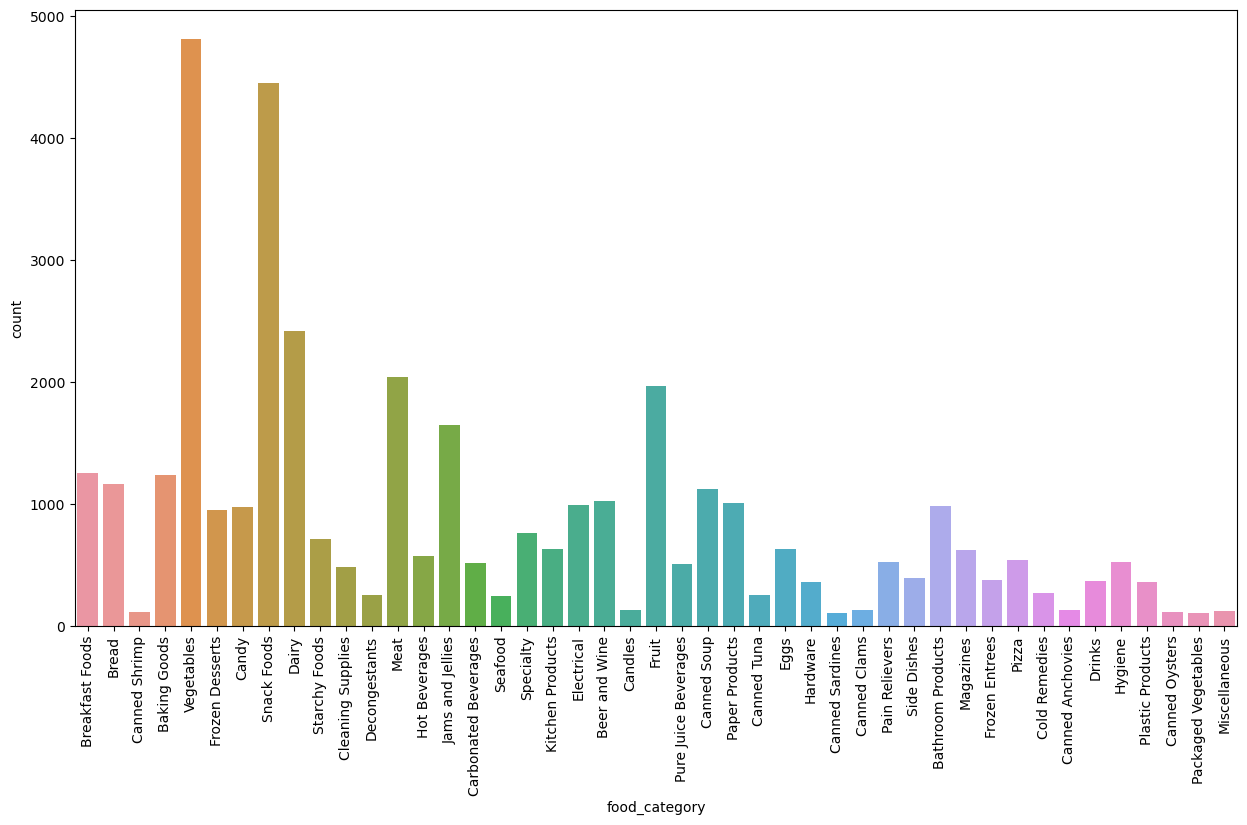

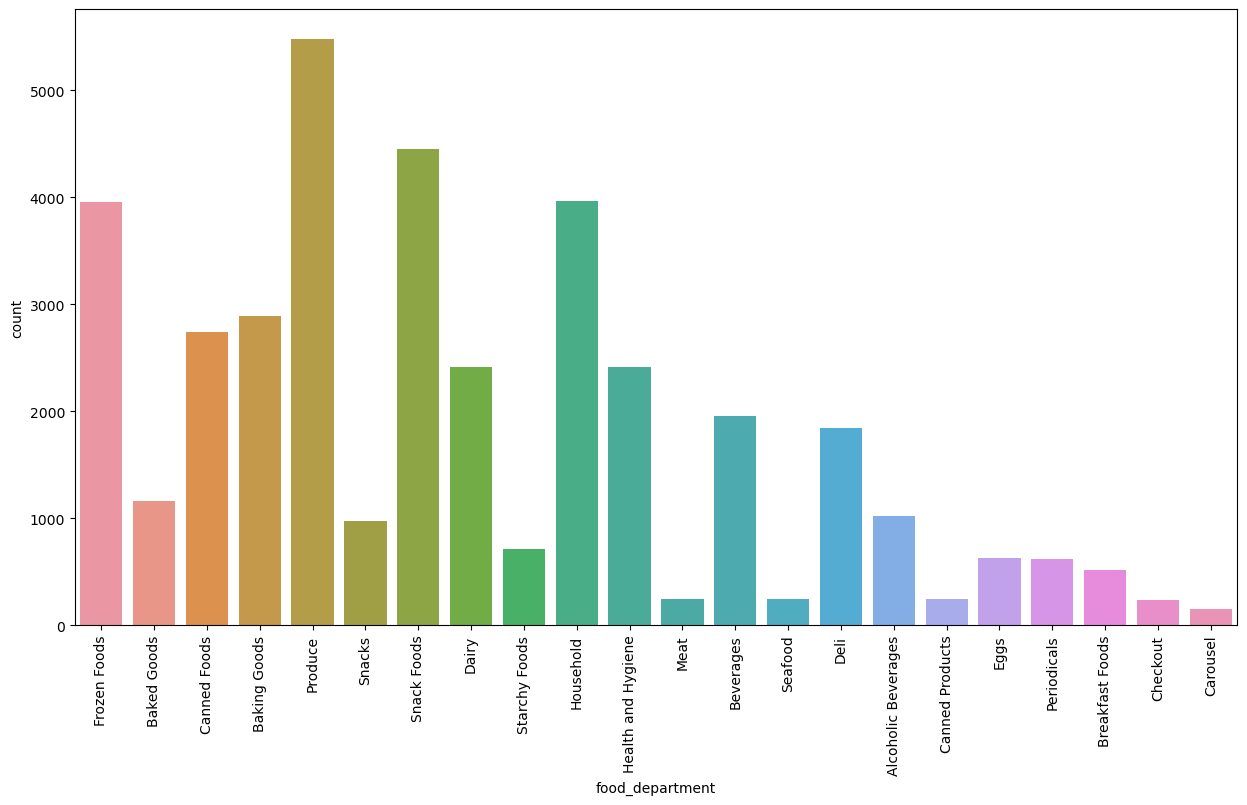

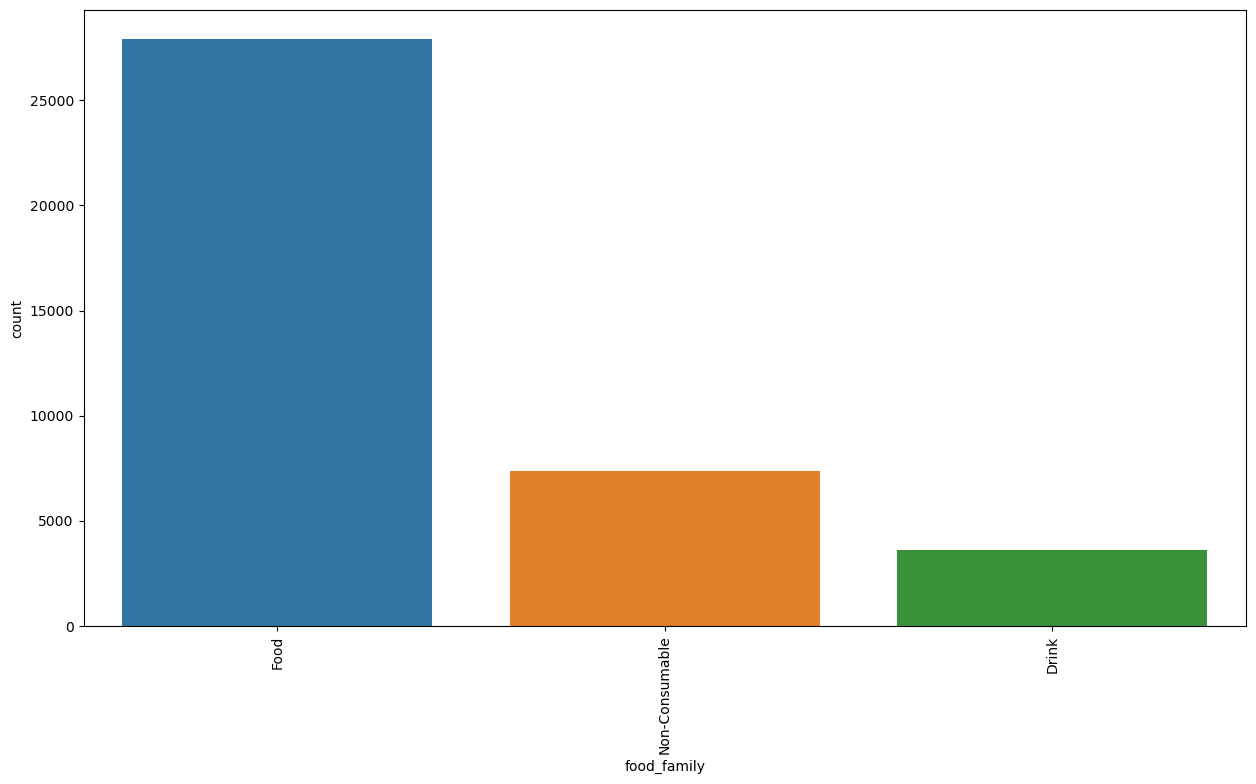

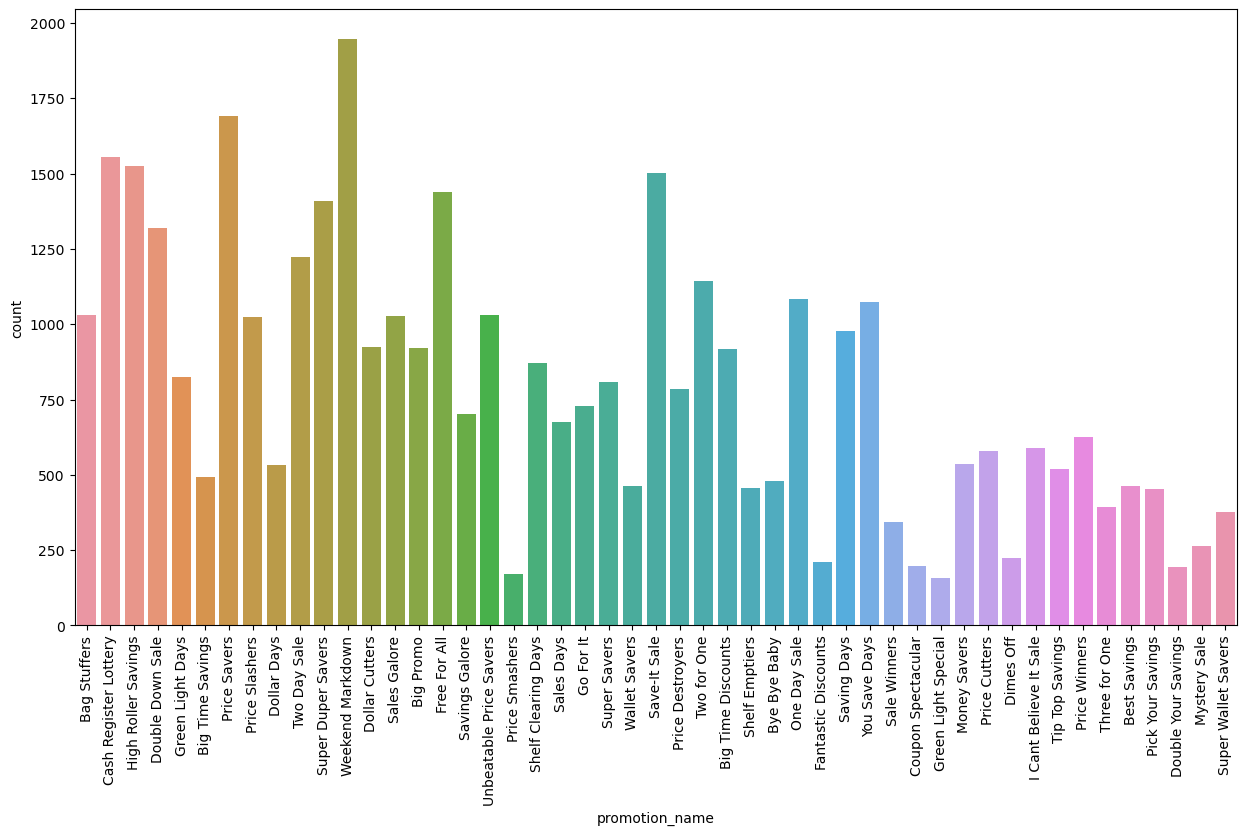

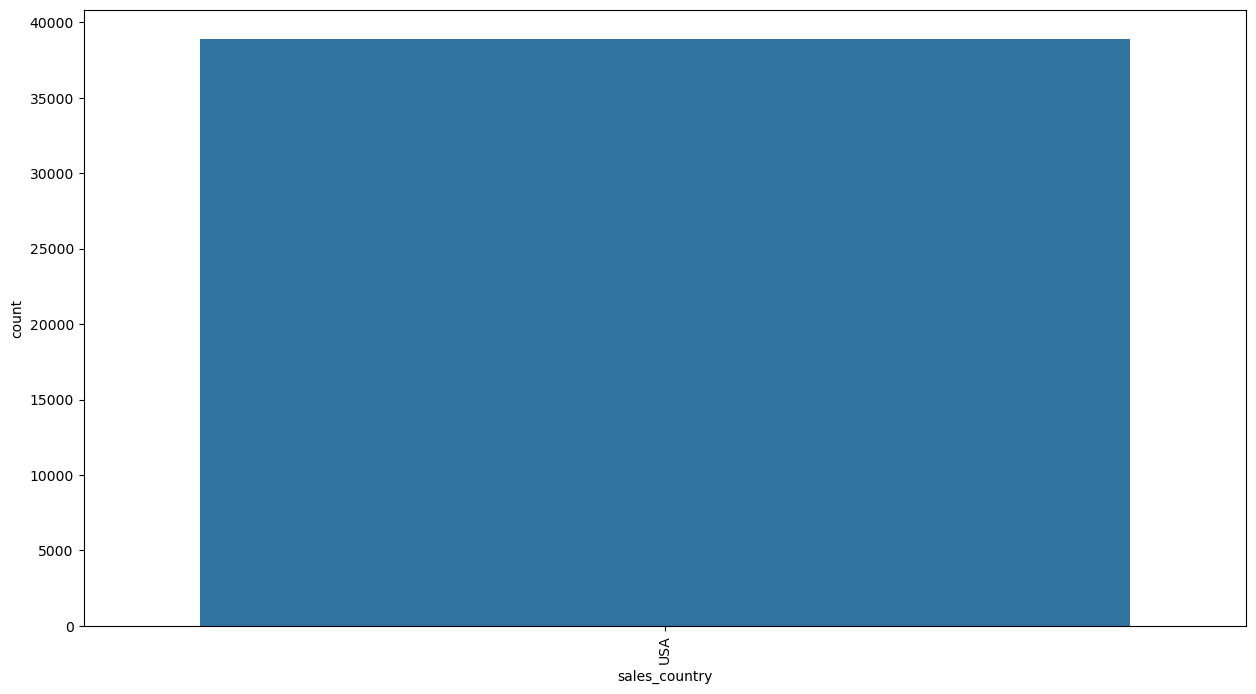

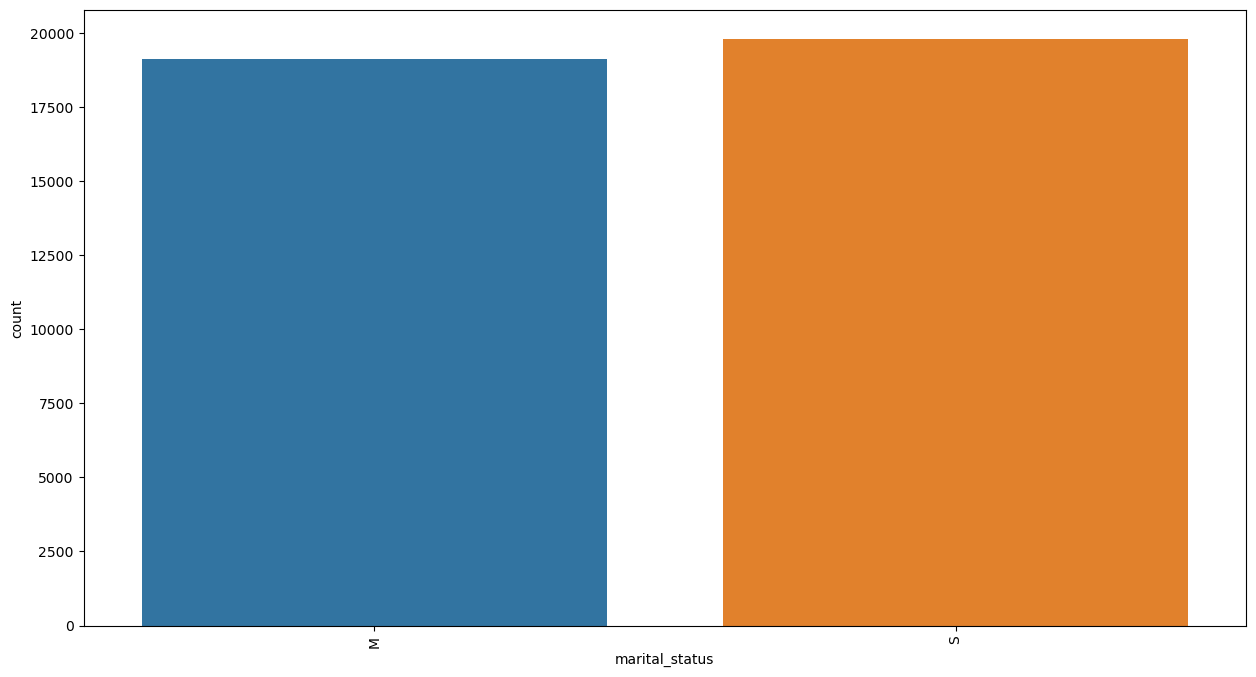

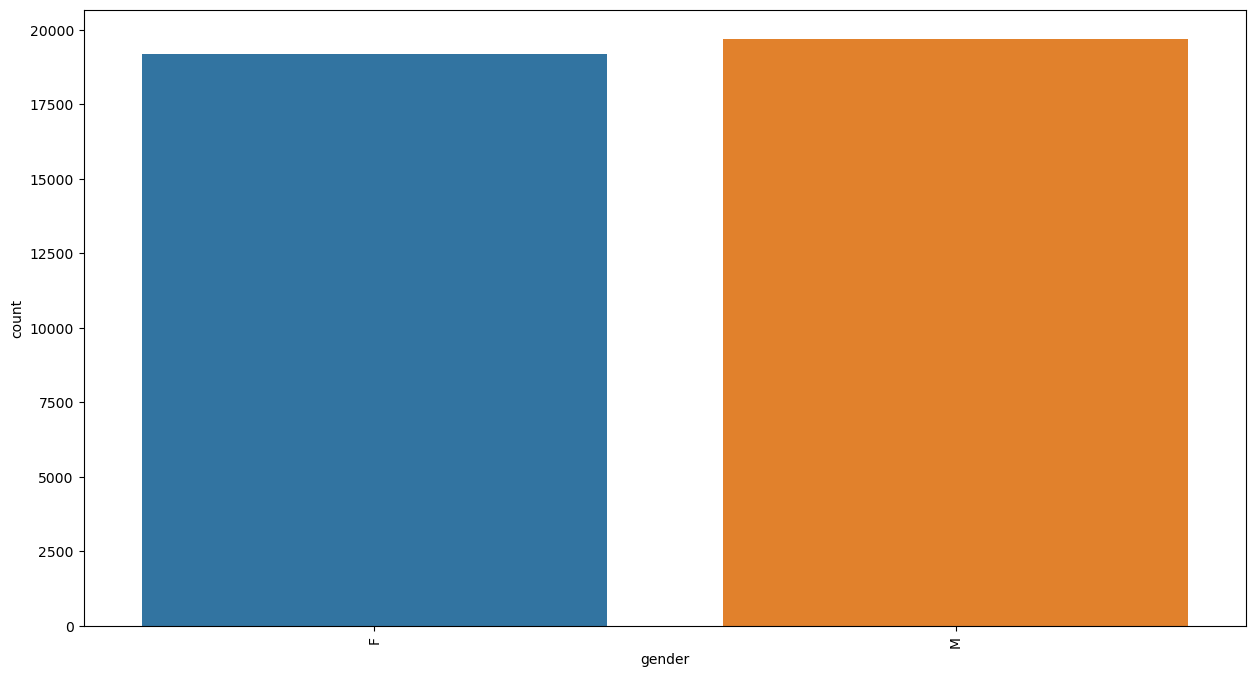

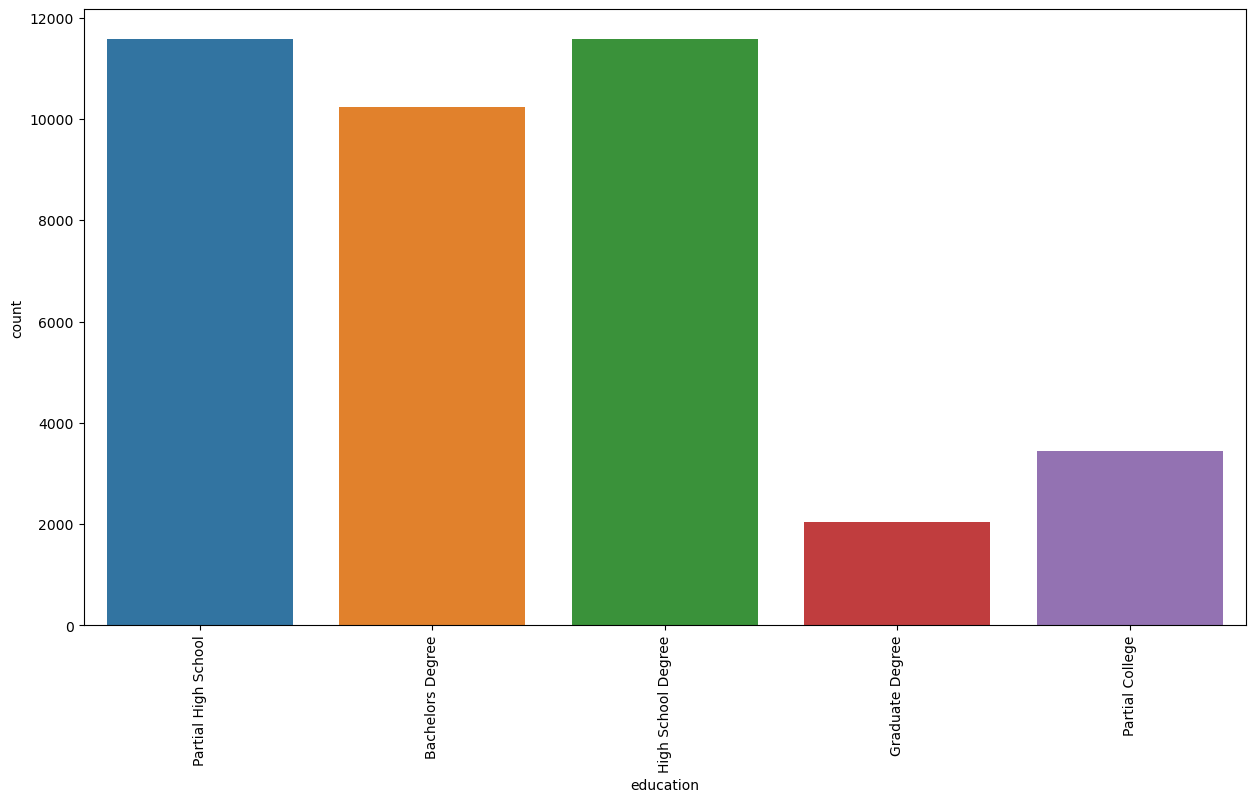

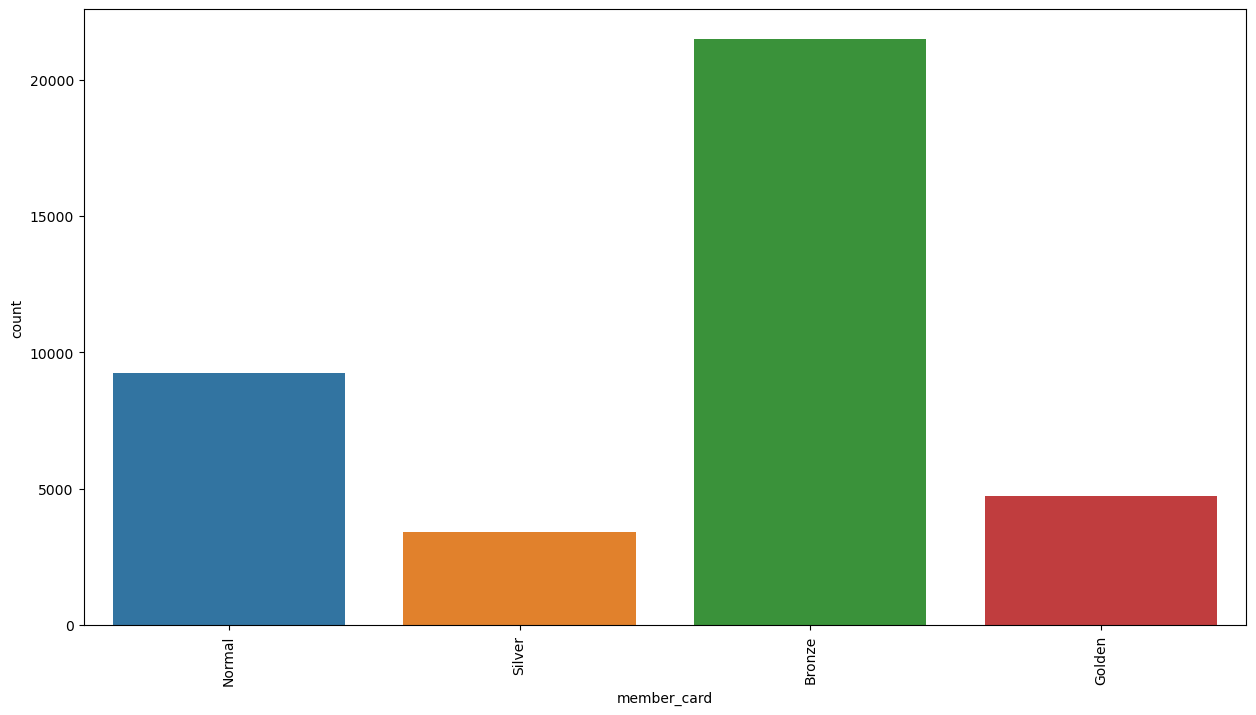

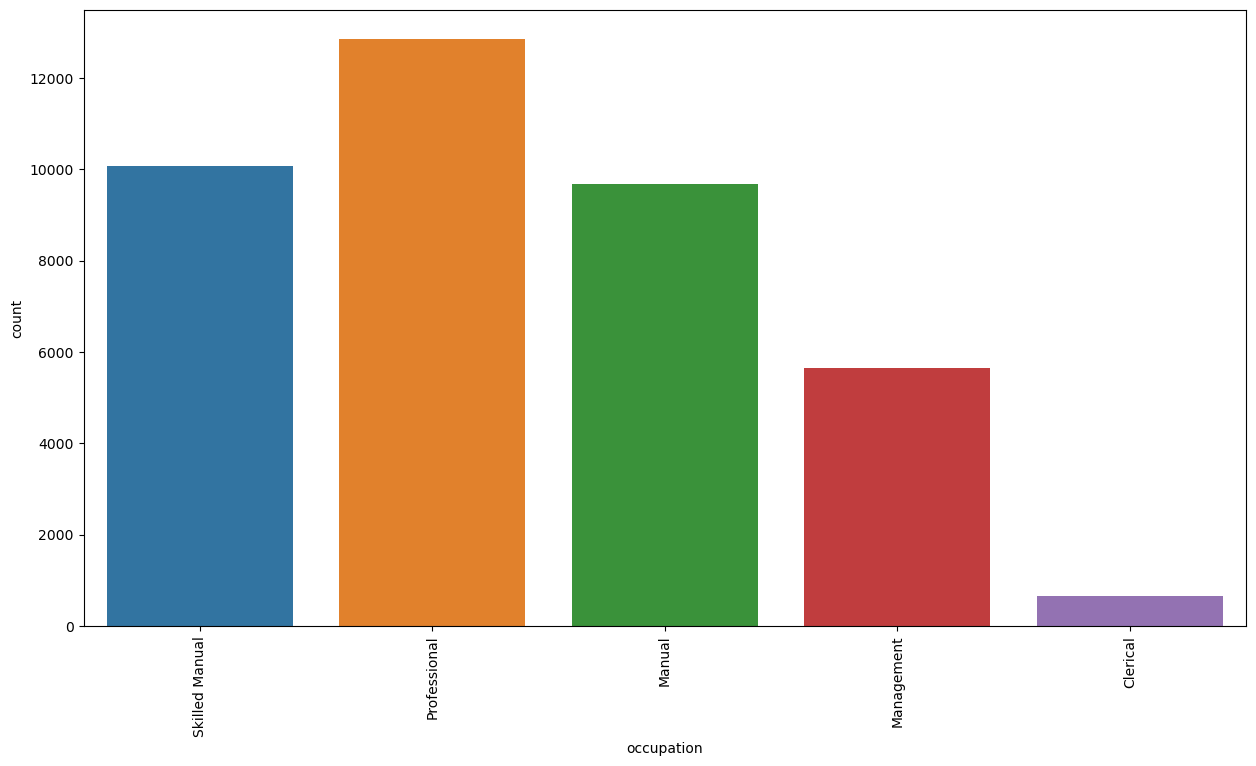

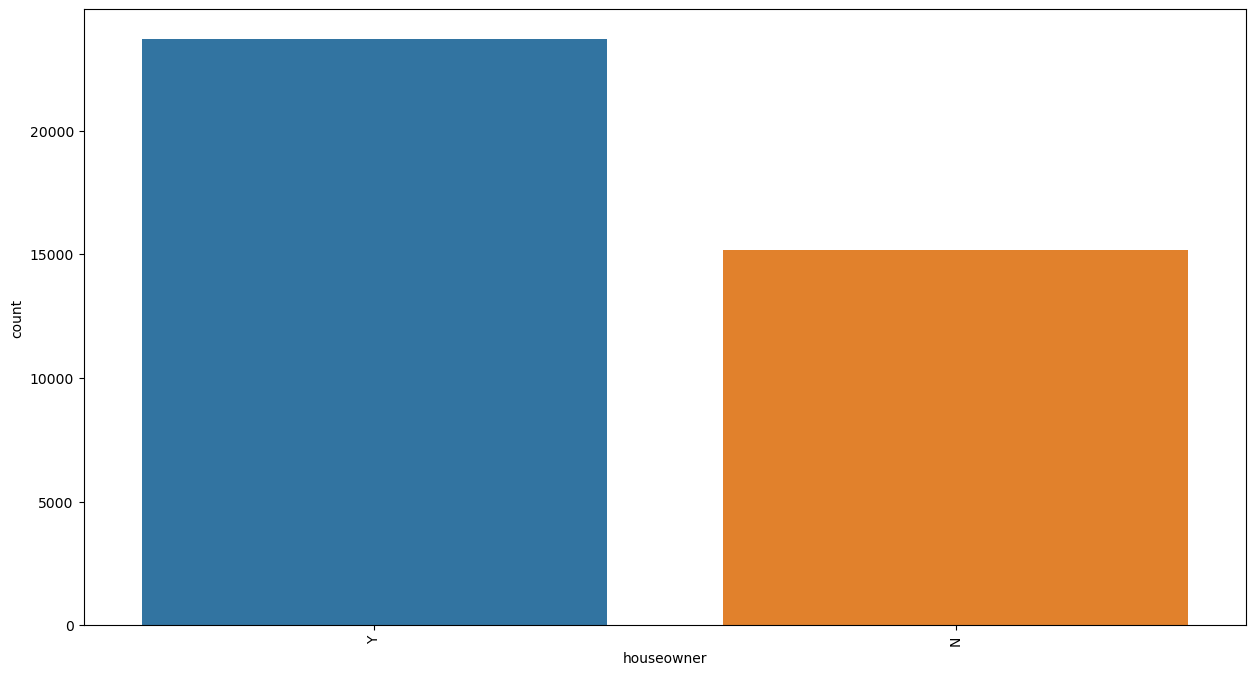

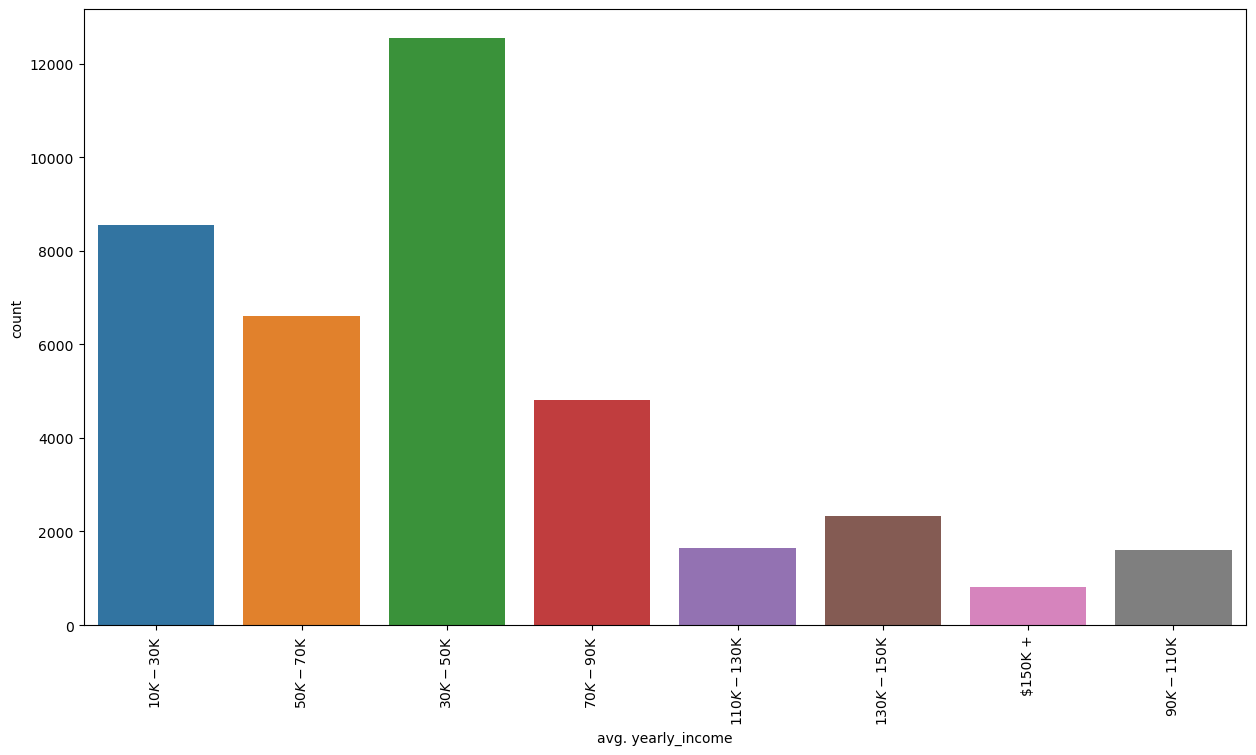

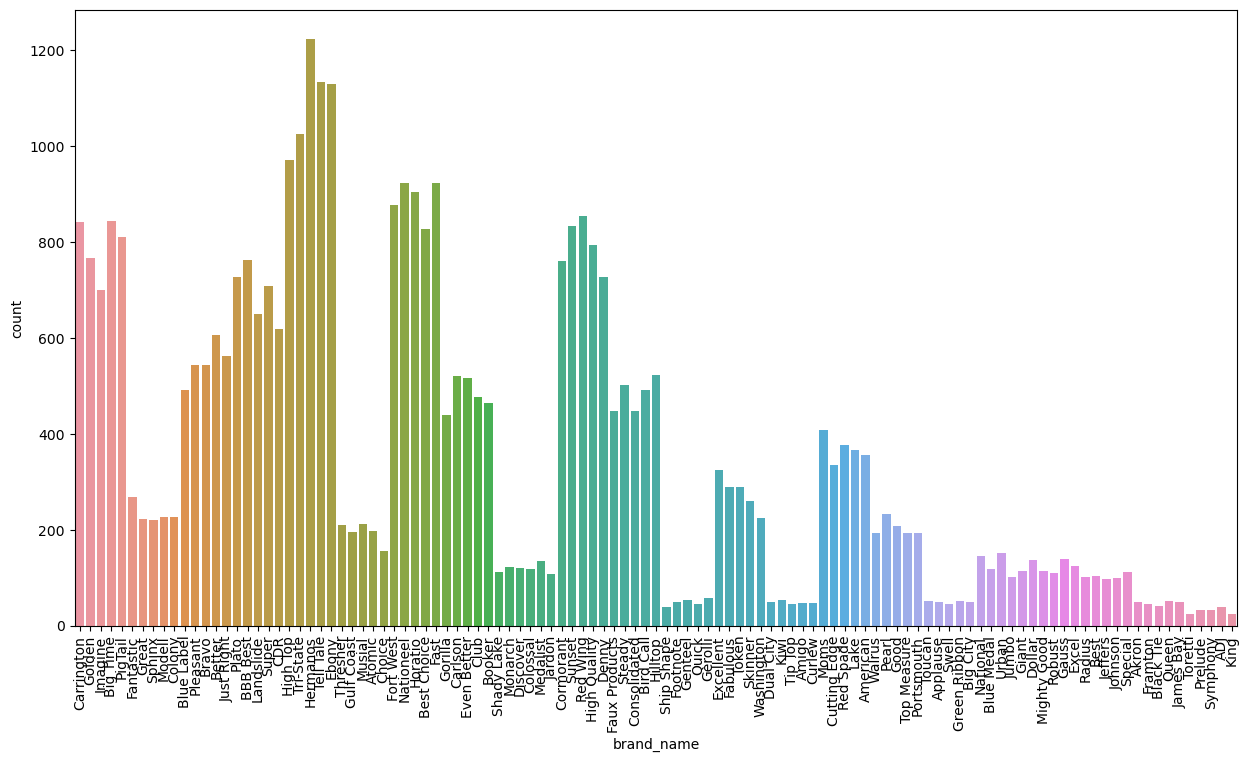

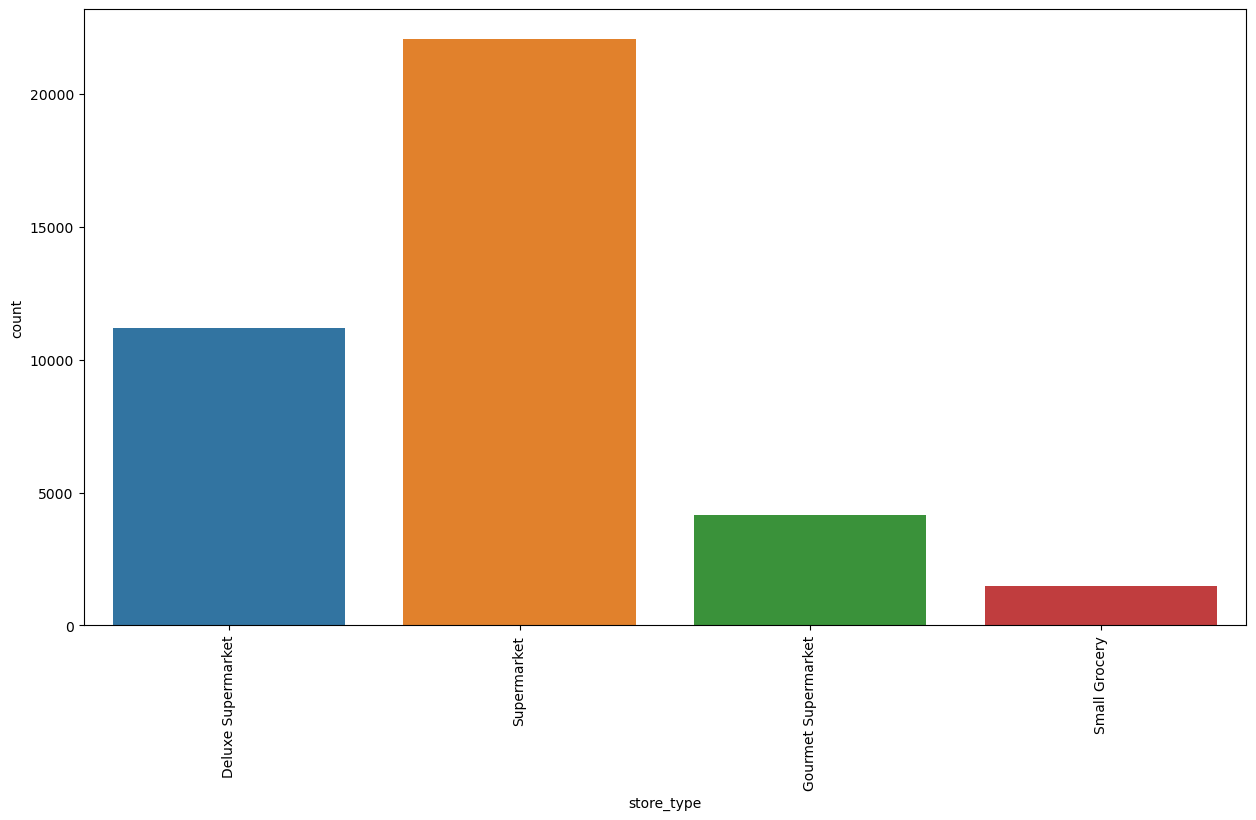

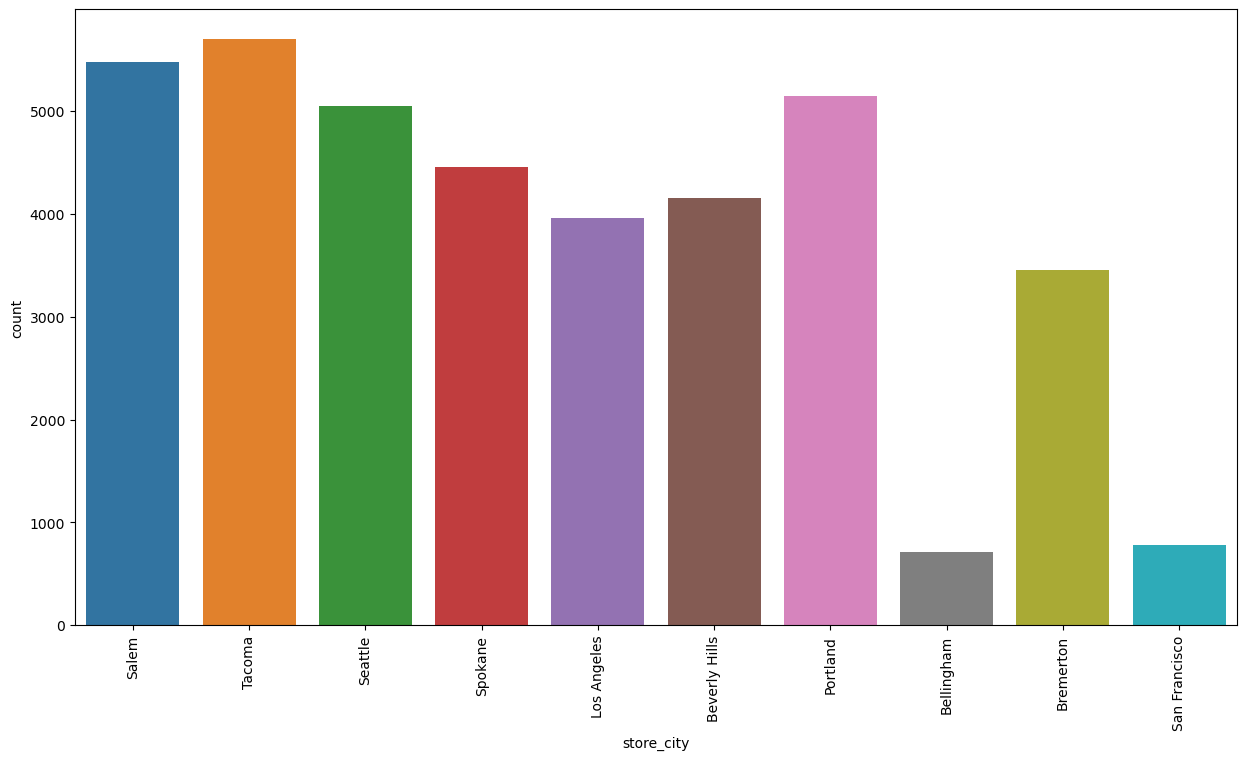

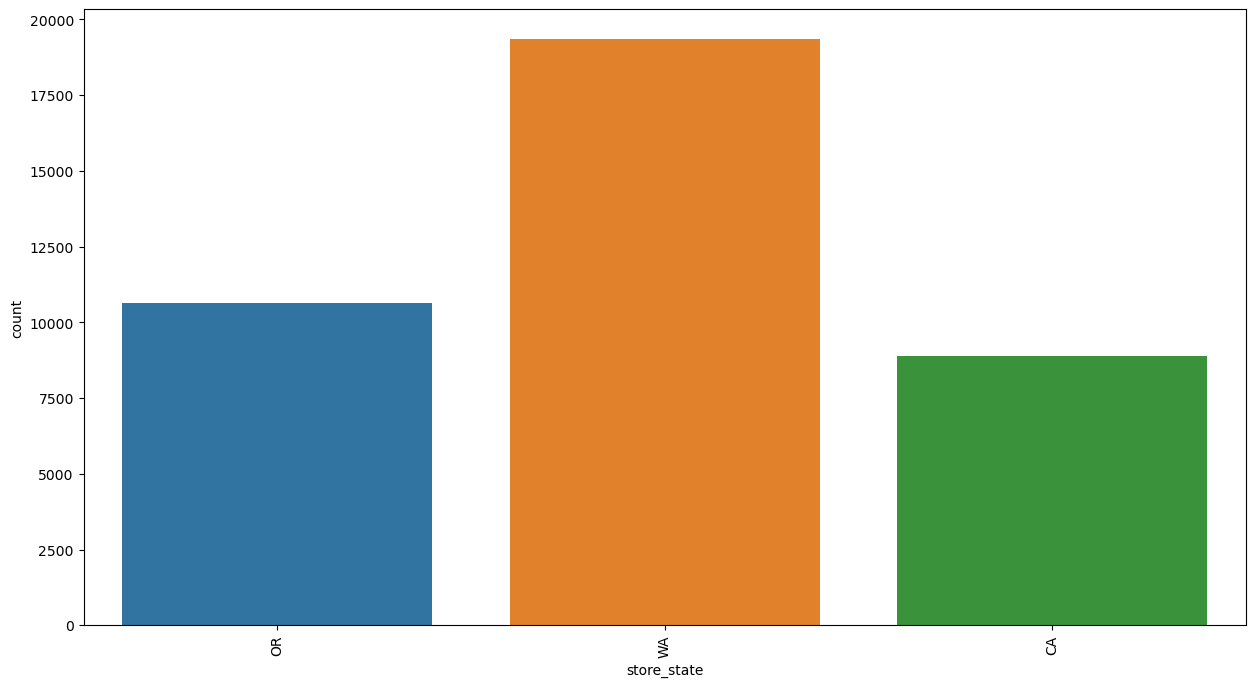

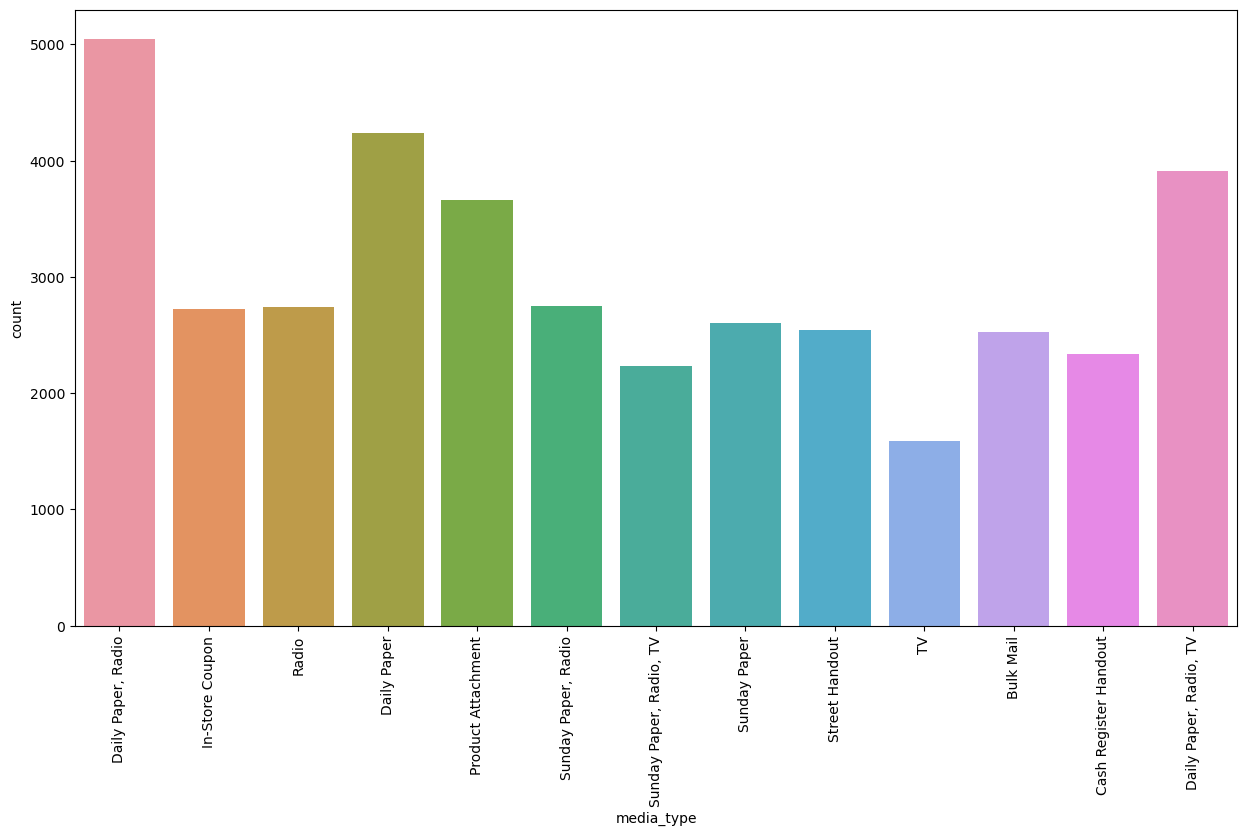

In [41]:
for col in usdf_cat.columns:
    sns.countplot(data=usdf_cat,x=col)
    plt.xticks(rotation=90)
    plt.show()
    
for col in df_cat.columns:
    sns.countplot(data=usdf_cat,x=col)
    plt.show()

## Outlier Treatment

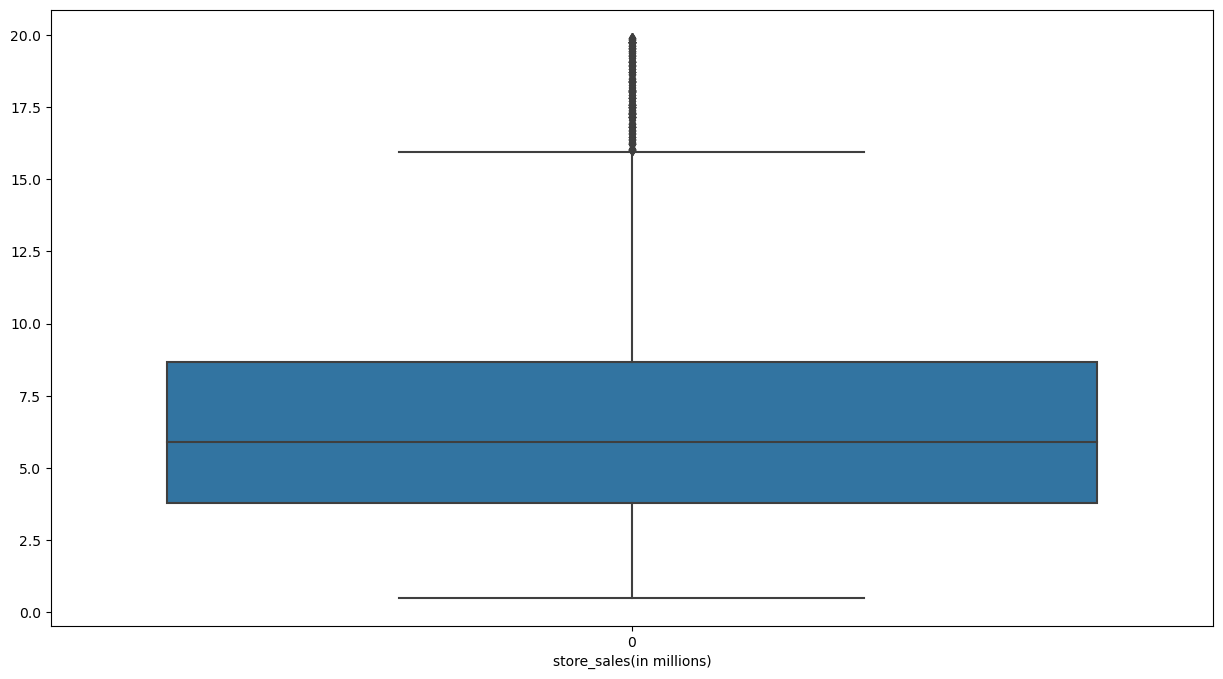

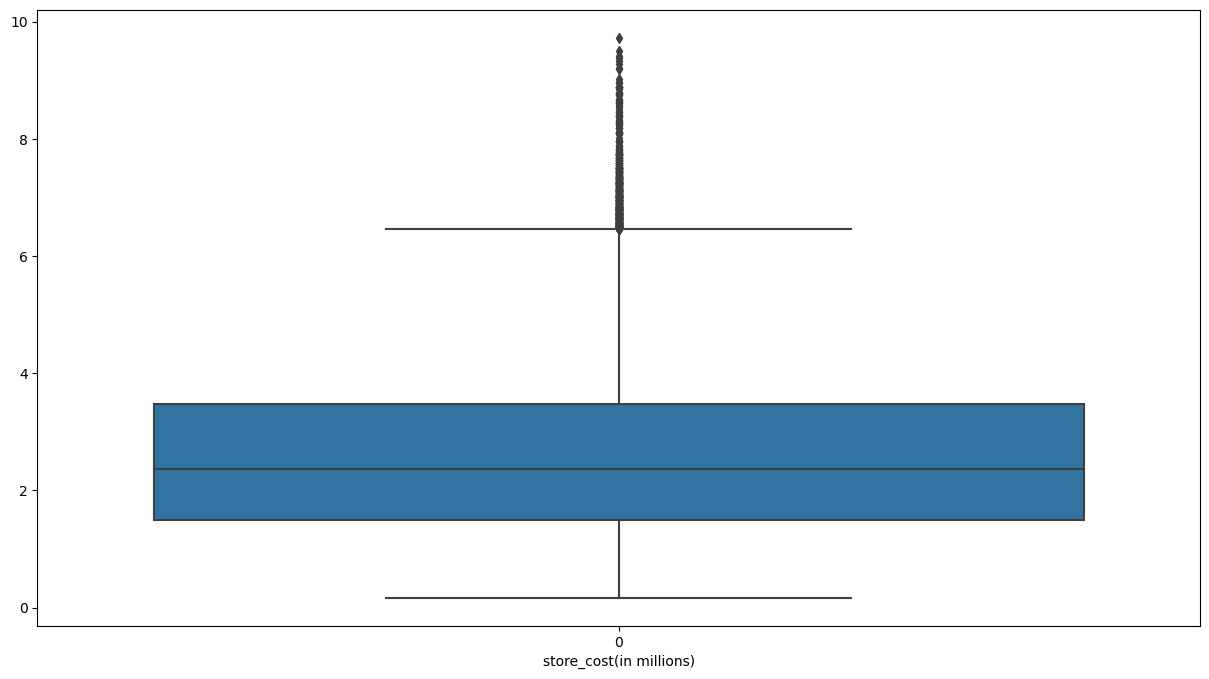

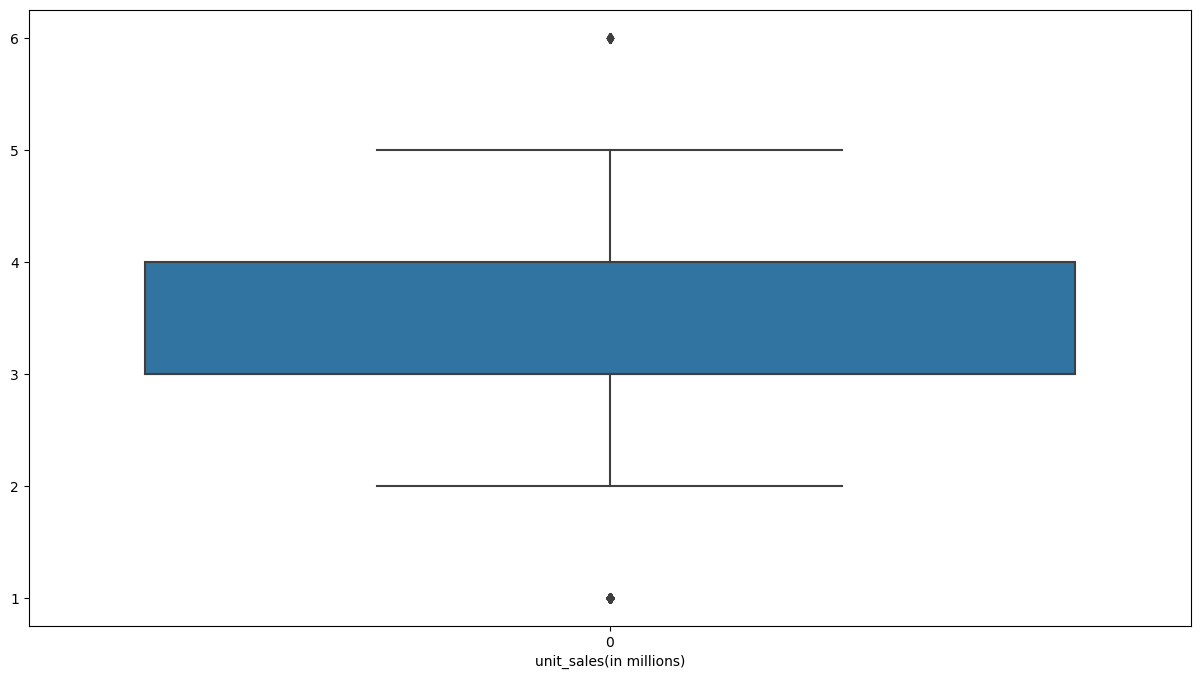

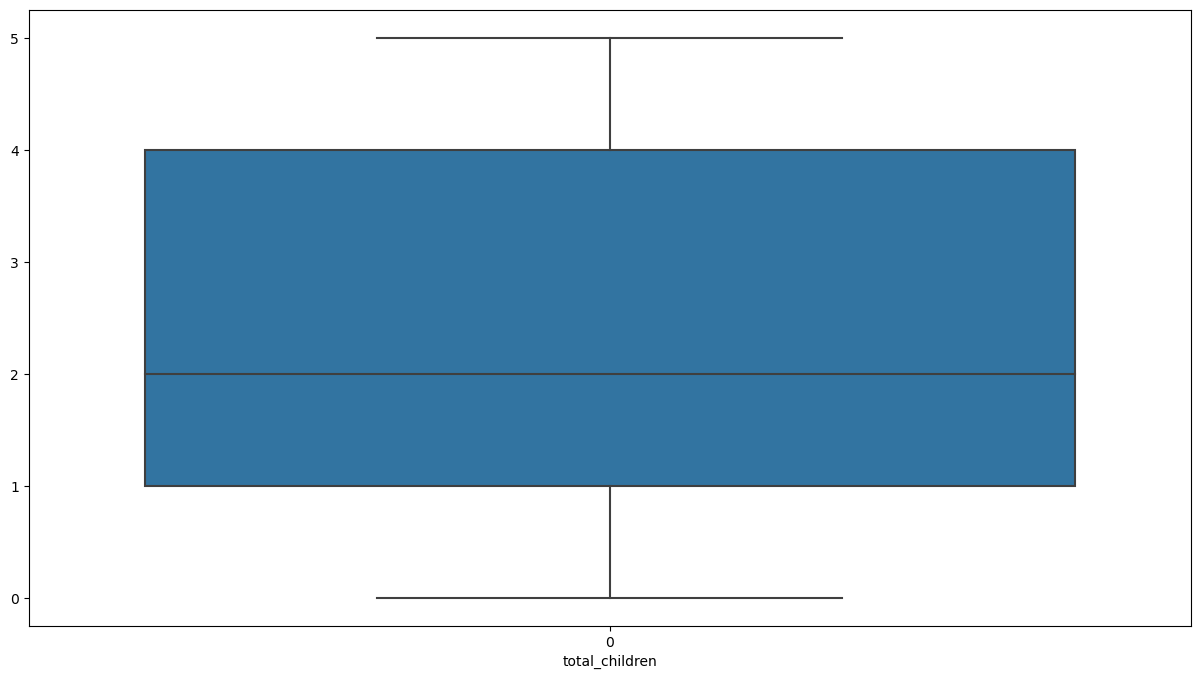

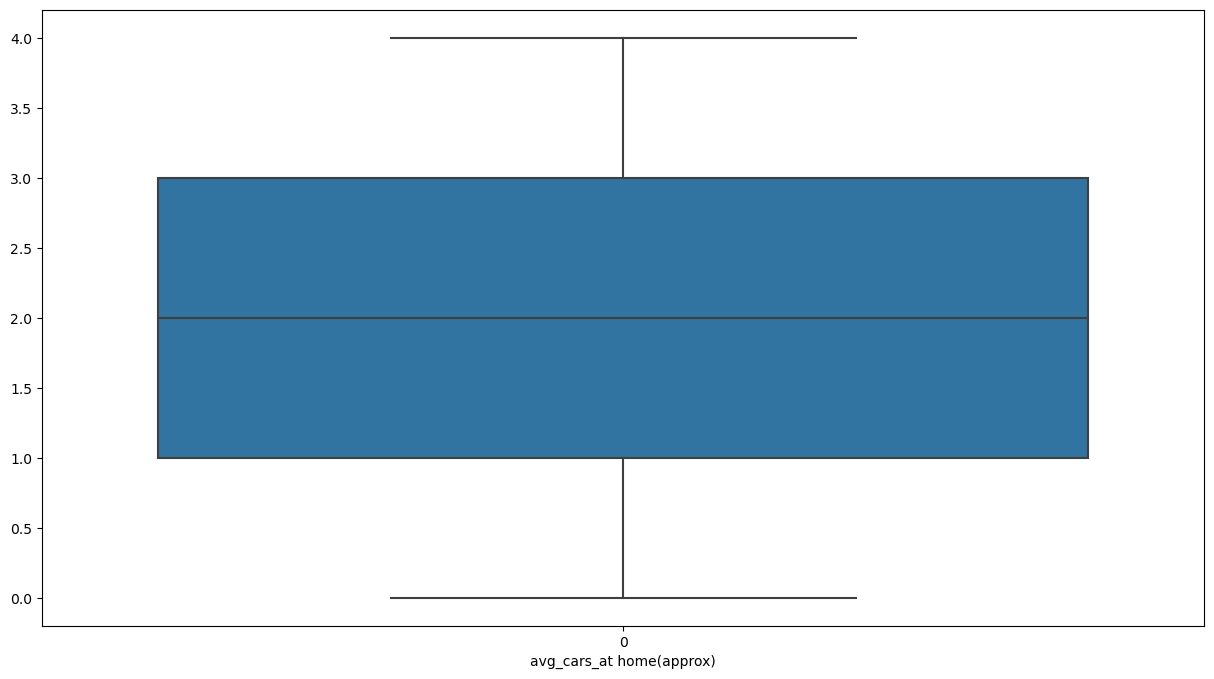

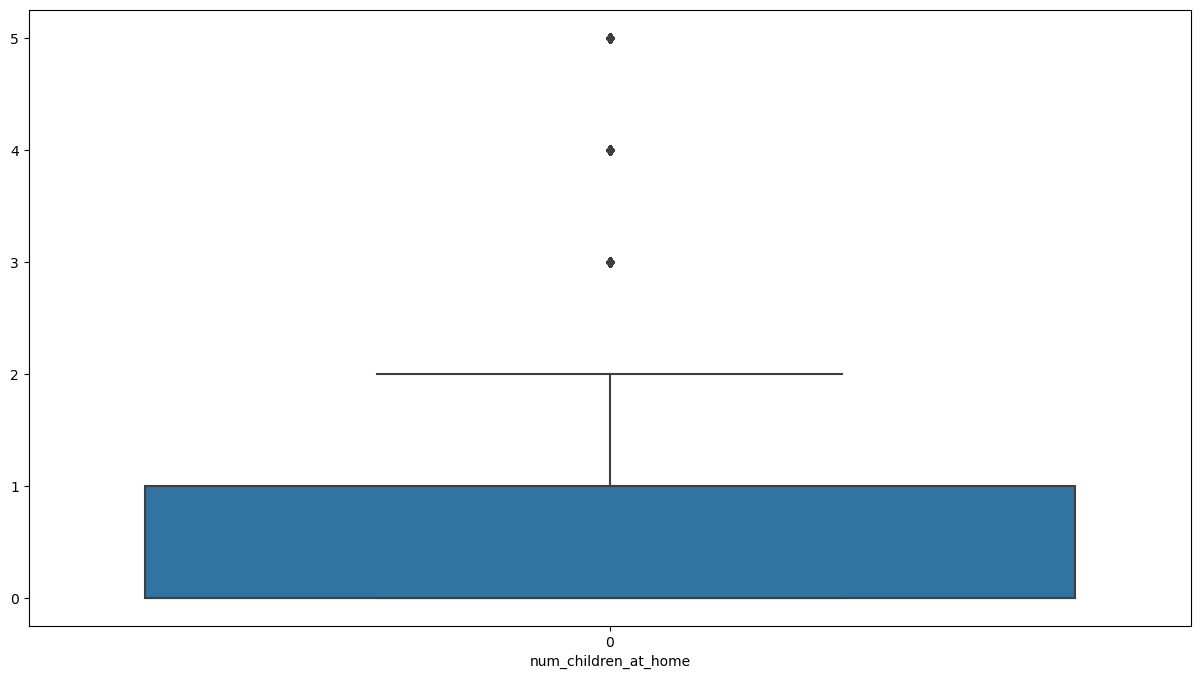

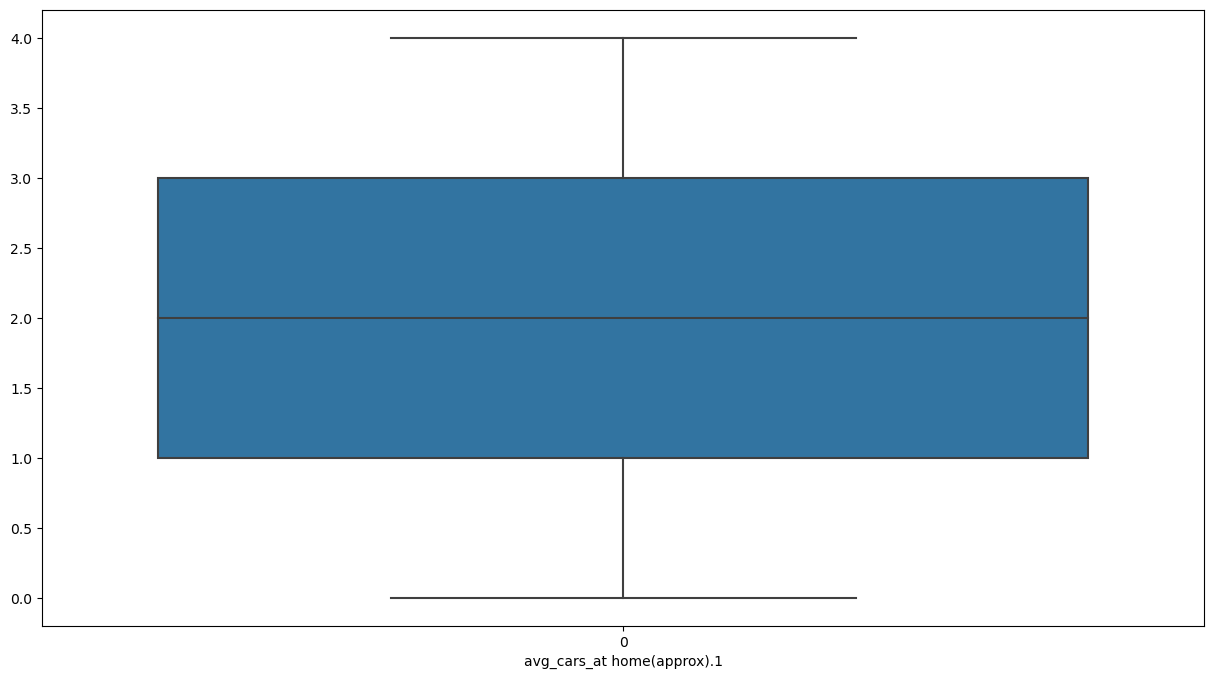

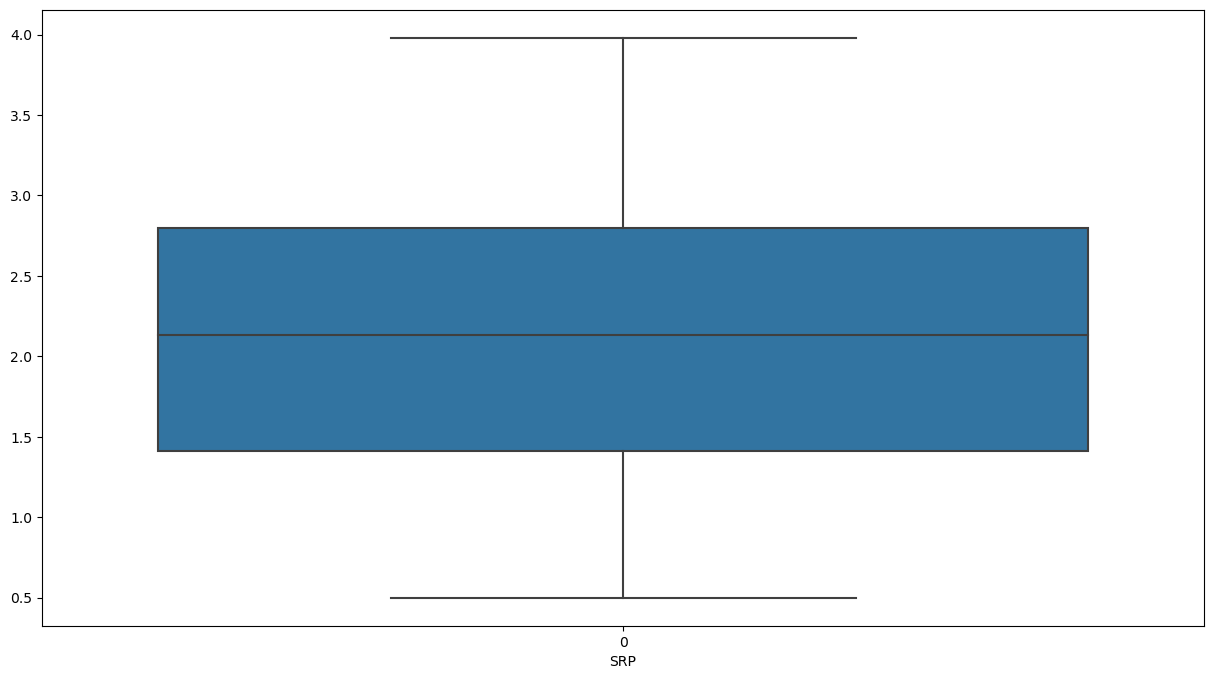

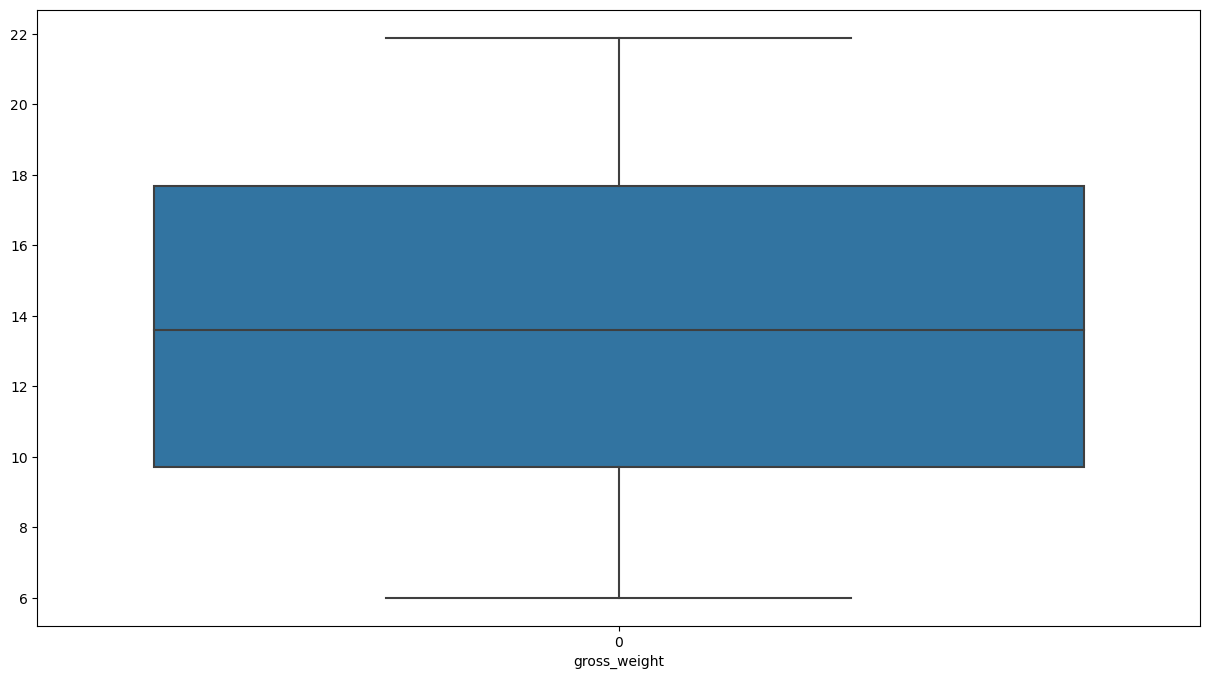

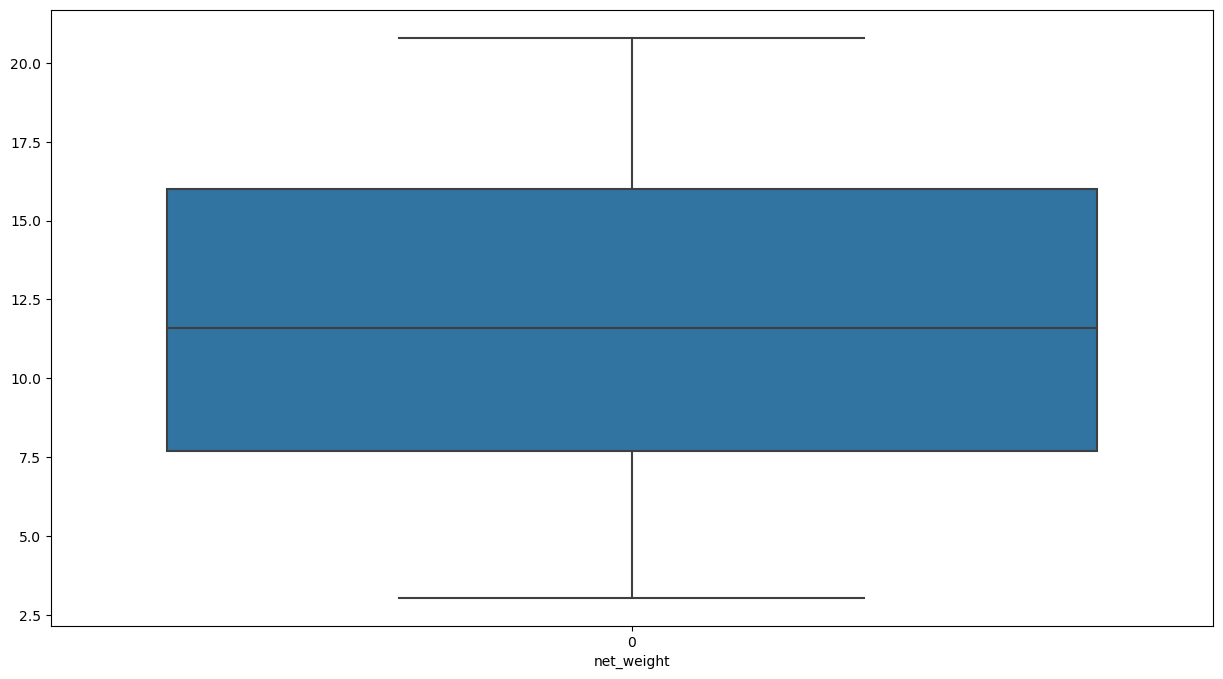

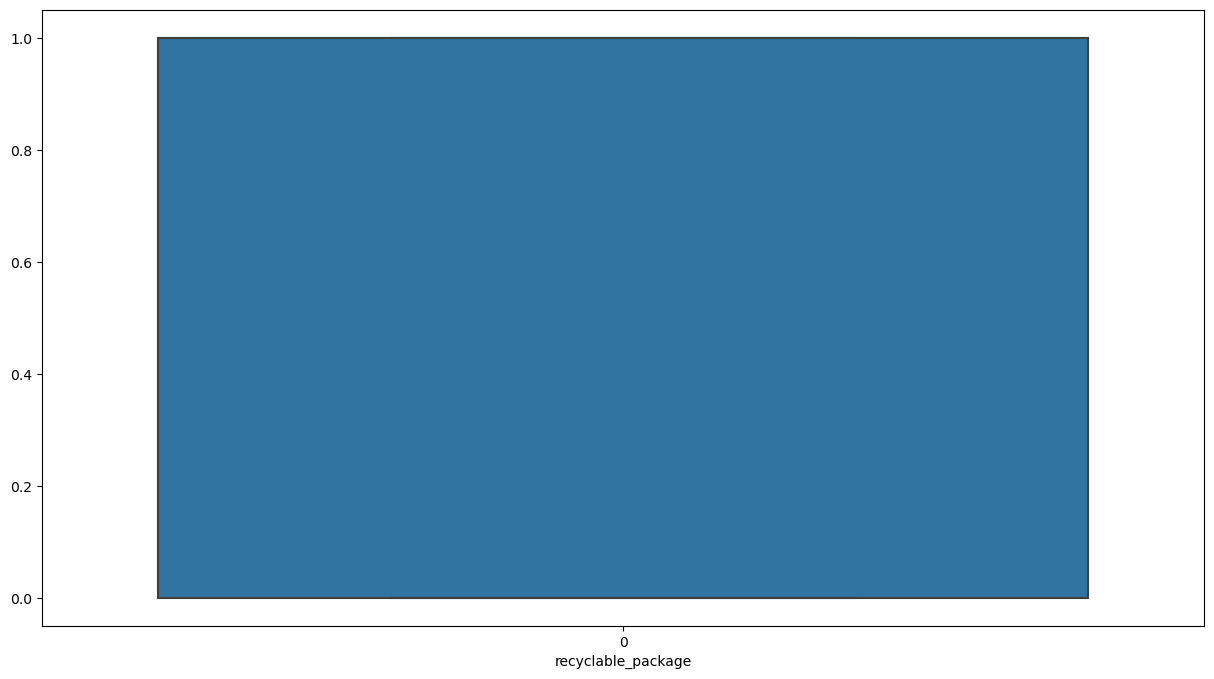

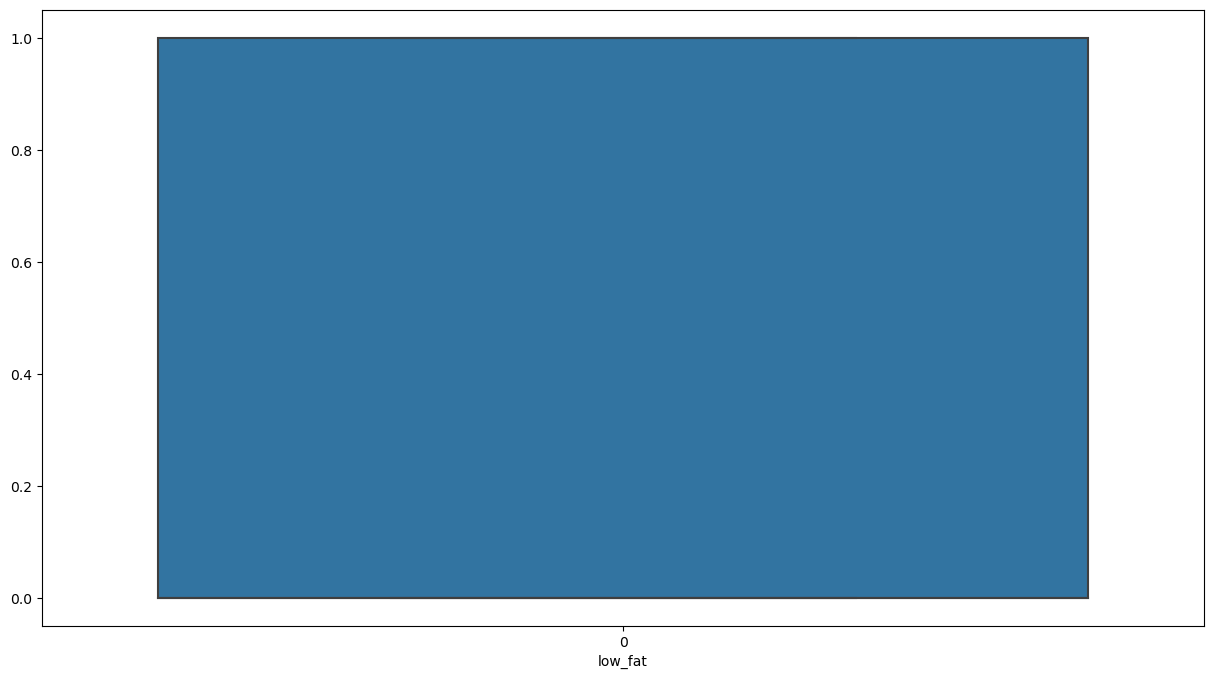

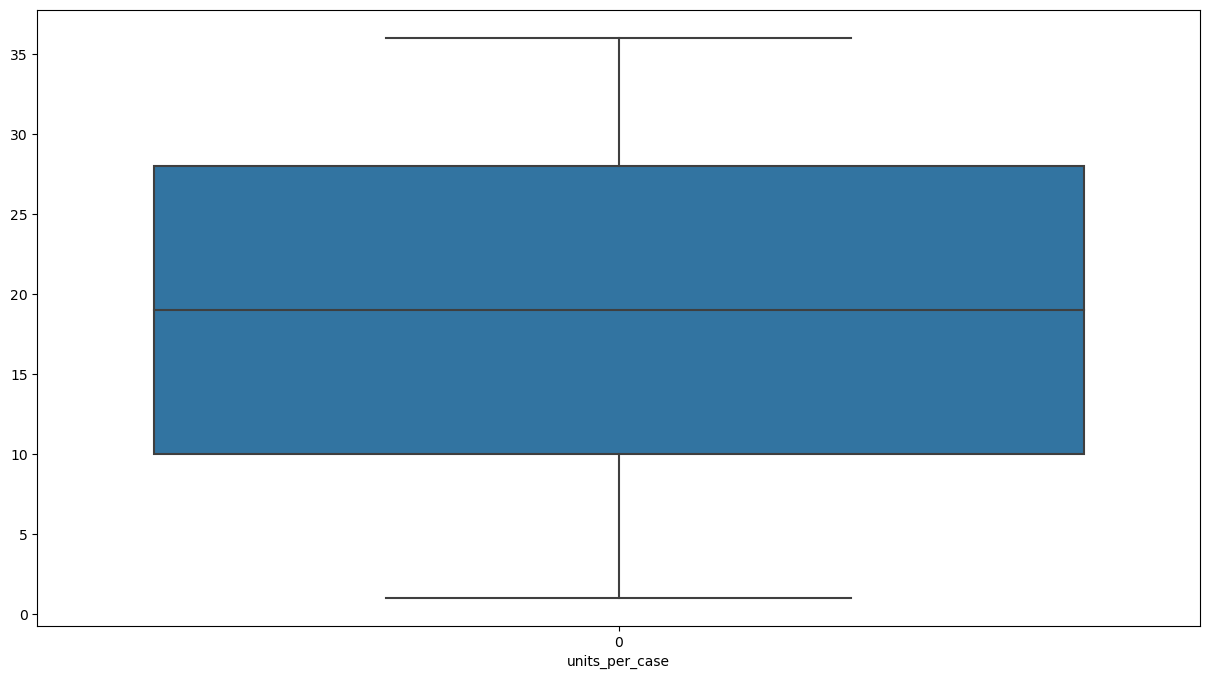

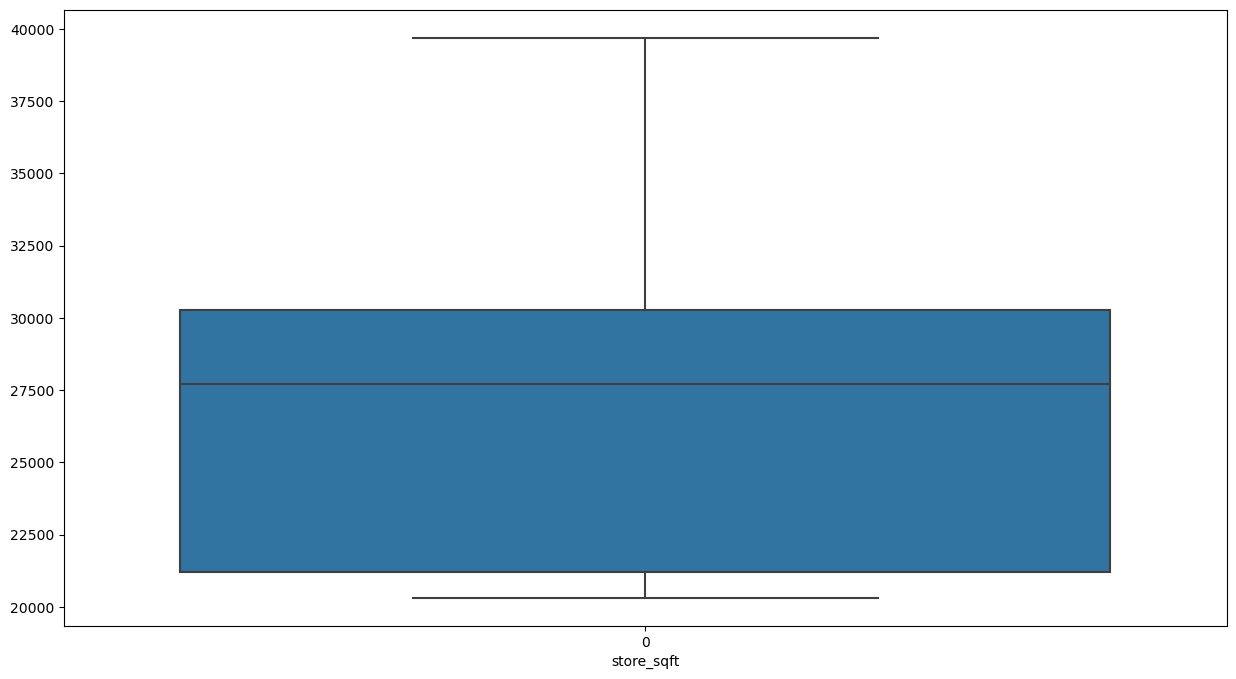

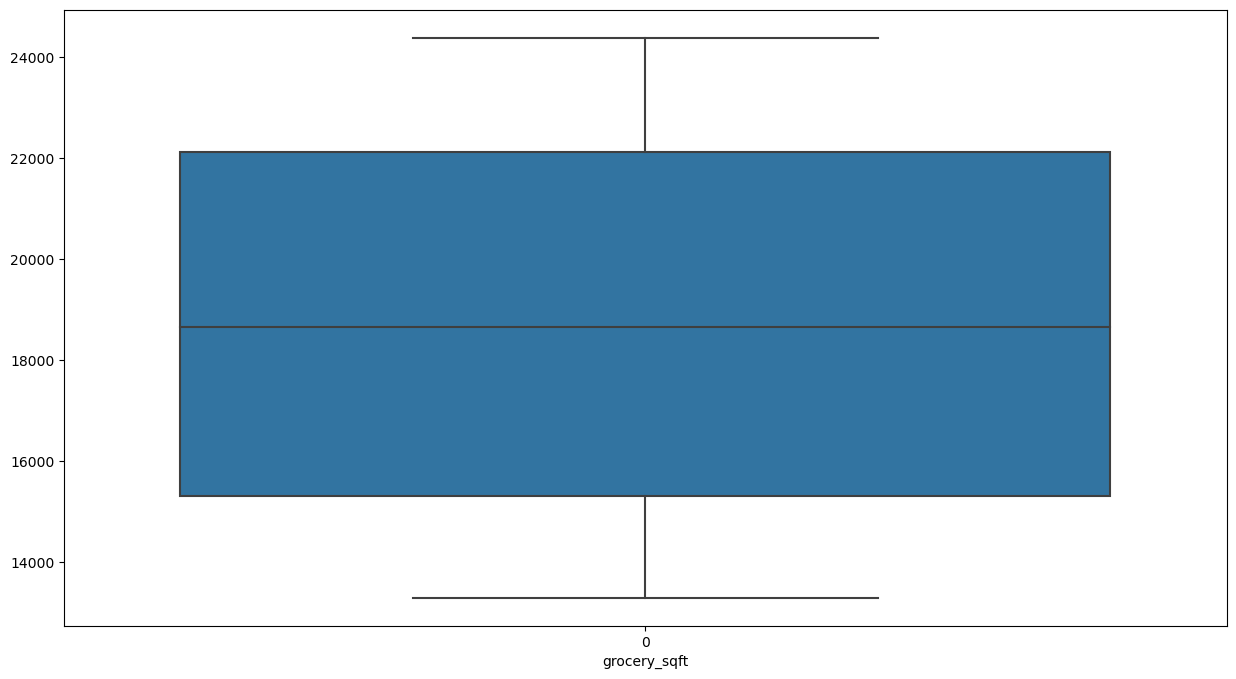

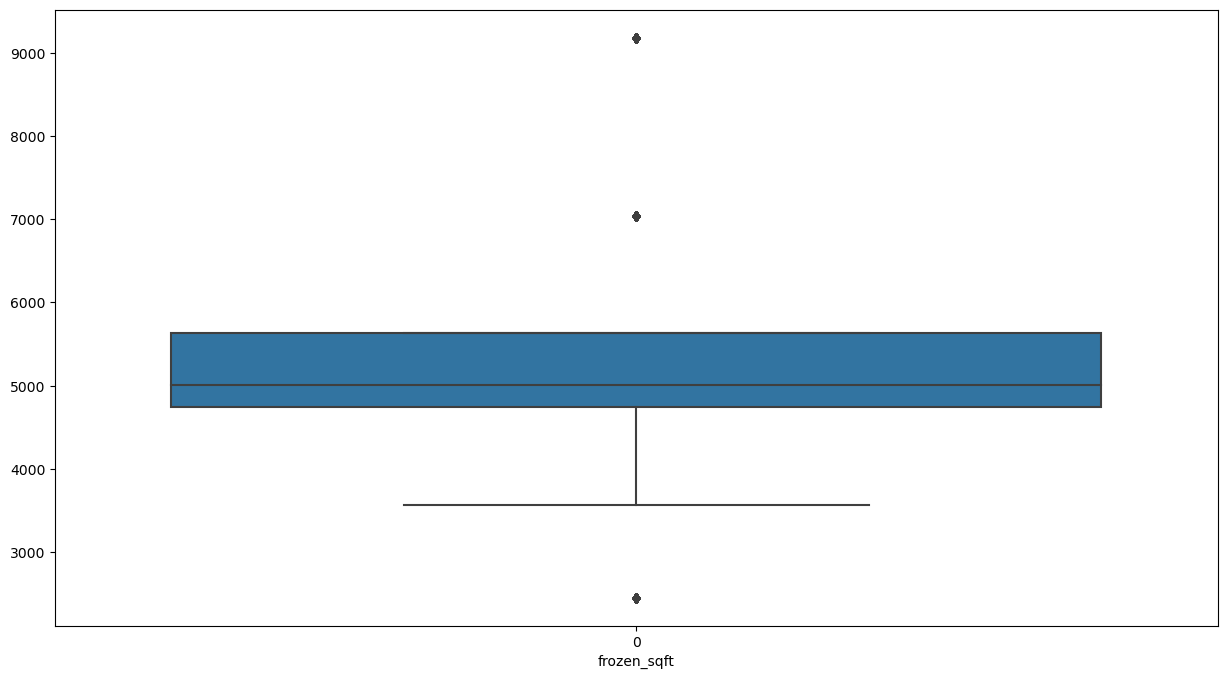

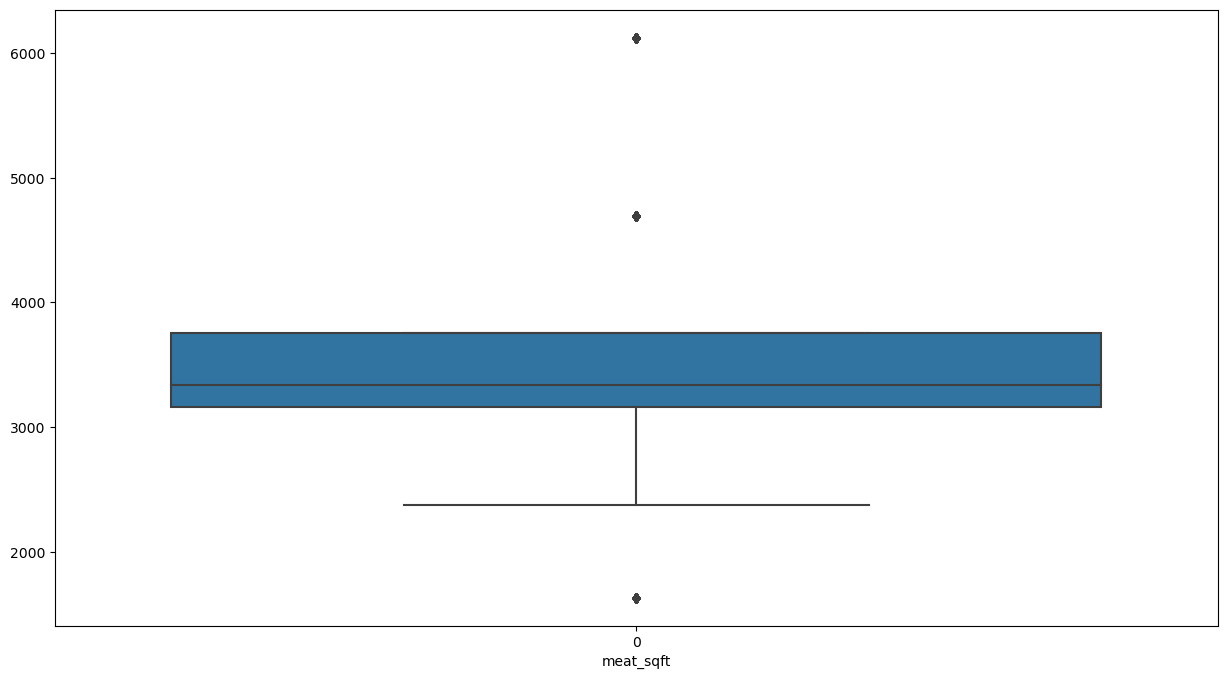

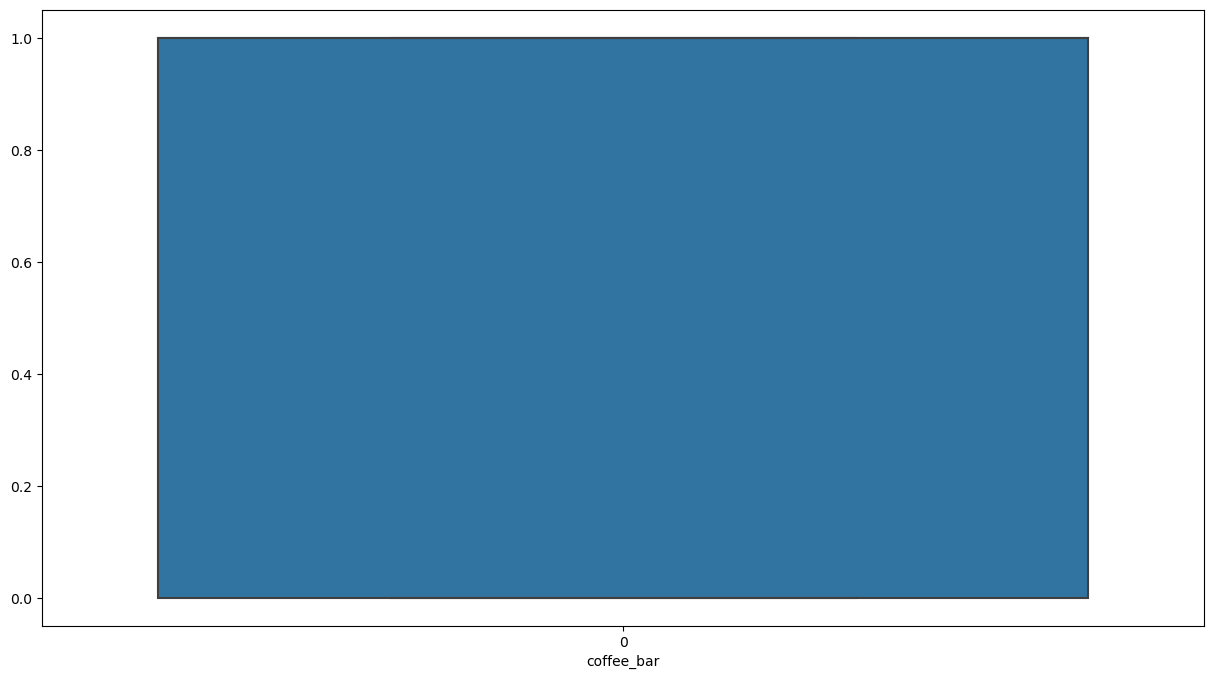

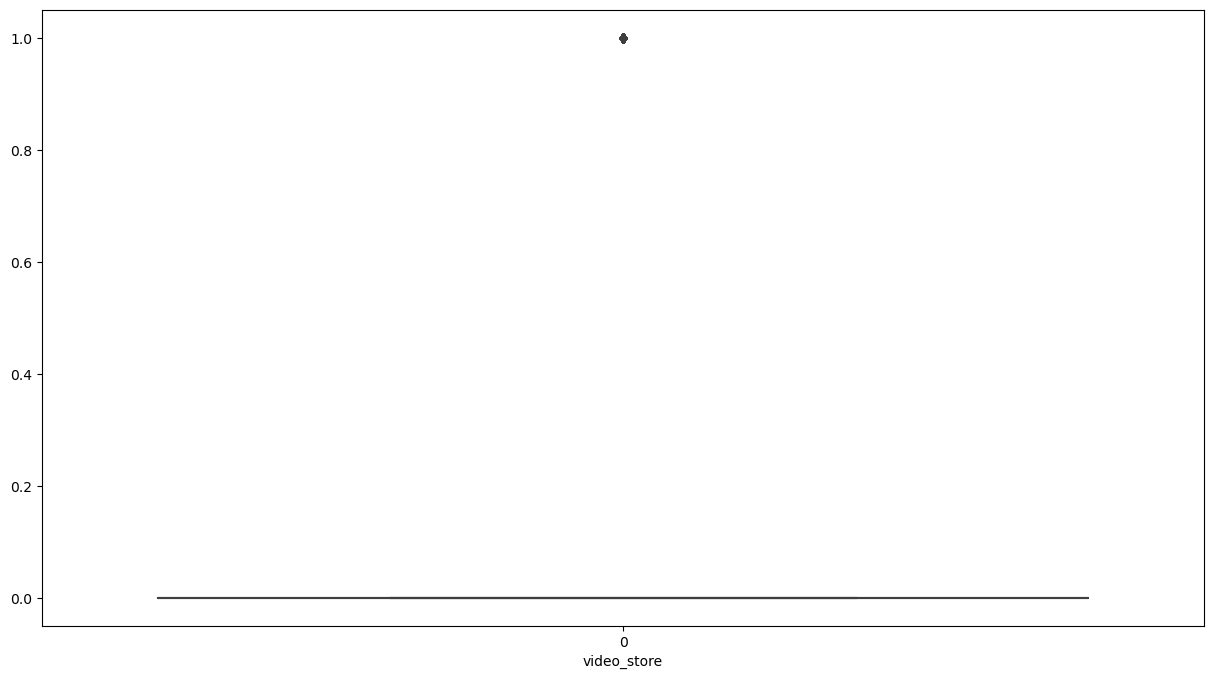

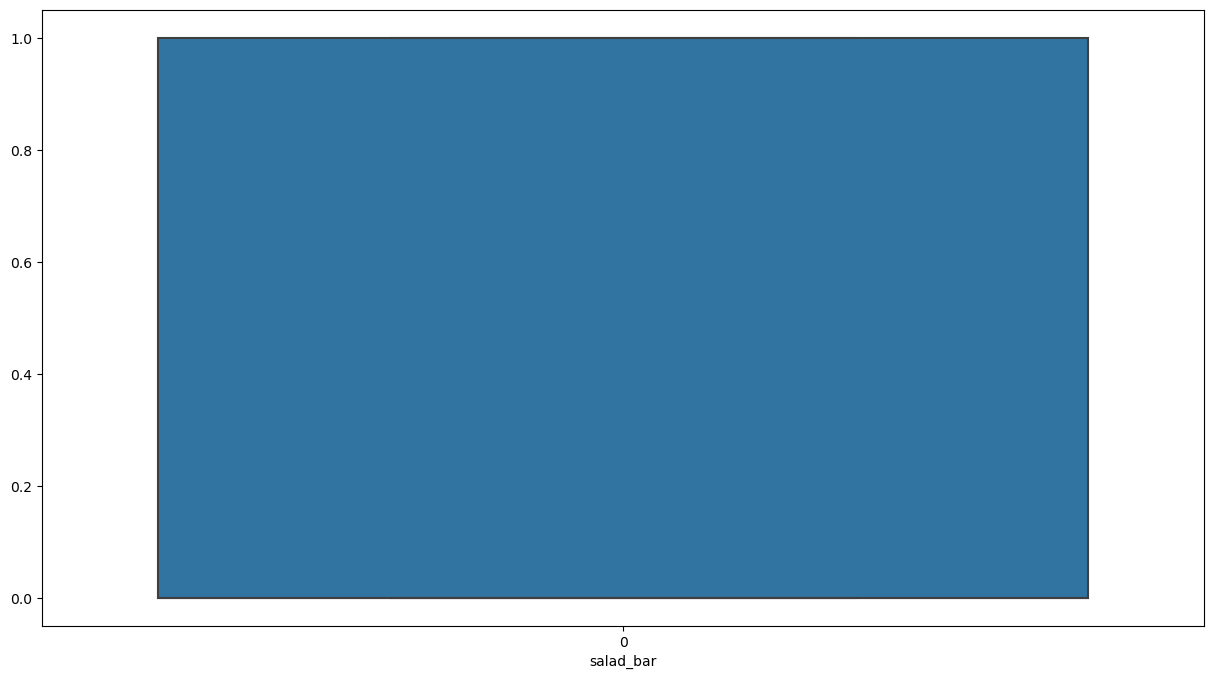

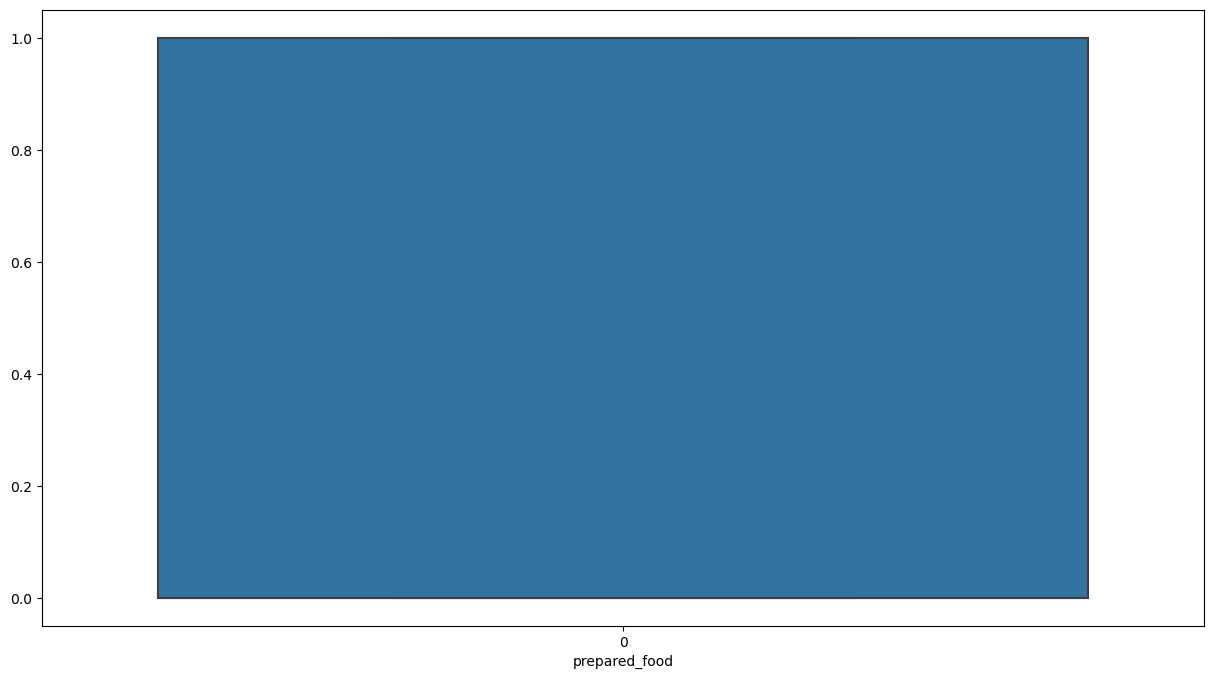

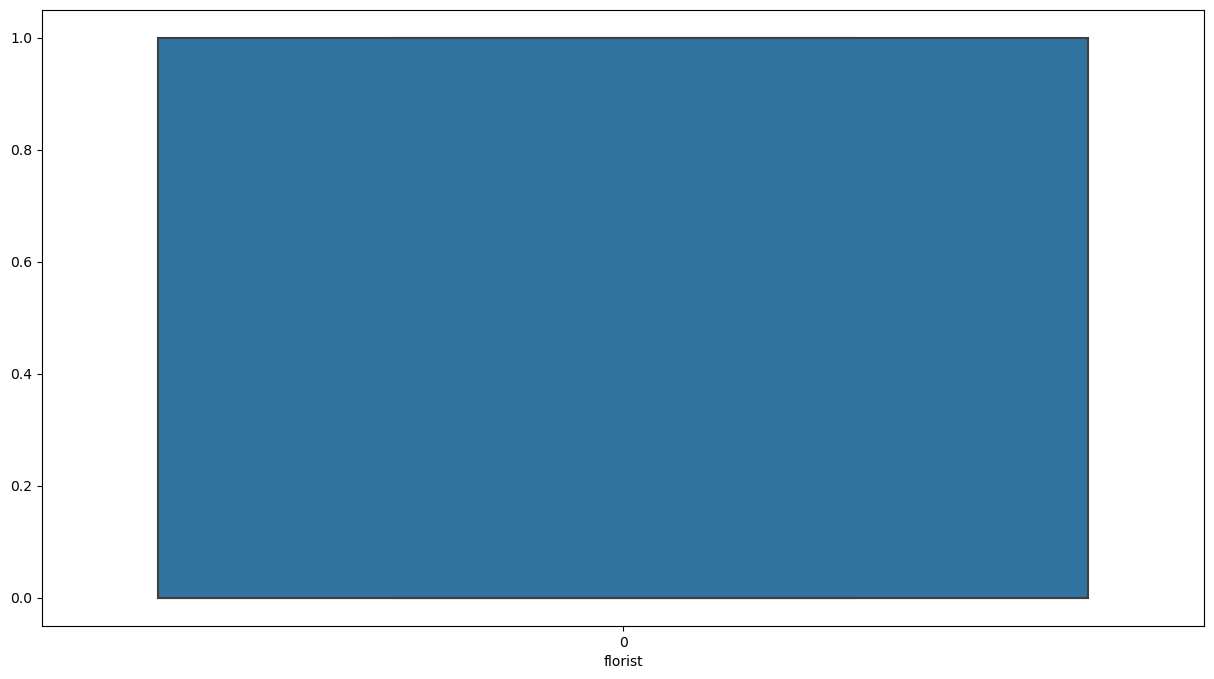

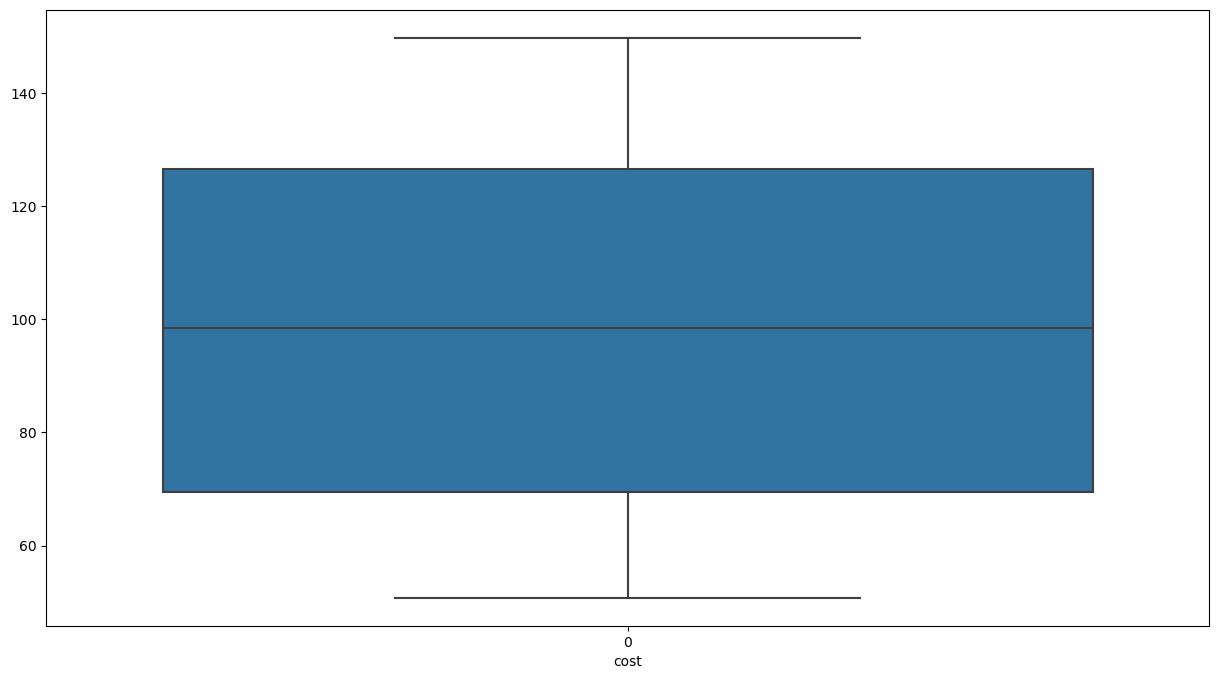

In [42]:
#fig,ax =plt.subplots(8,3,figsize=(180,100))

for col in usdf_num.columns:
    sns.boxplot(usdf_num[col])
    plt.xlabel(col)
    plt.show()
    


In [43]:
usdf_num.shape

(38892, 23)

In [44]:
Q1 = usdf_num.quantile(0.25)
Q3 = usdf_num.quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

usdf_num_one = usdf_num[~((usdf_num > upper_limit)|(usdf_num<lower_limit)).any(axis=1)]


q1=df_num.quantile(0.25)
q3=df_num.quantile(0.75)

iqr=q3-q1
up_limit=q3+1.5*iqr
ll_limit=q1-1.5*iqr

df_num_one=df_num[~((df_num>up_limit)|(df_num<lower_limit)).any(axis=1)]

In [45]:
usdf_num_one.shape

(11976, 23)

In [46]:
Q1 = usdf_num.quantile(0.25)
Q3 = usdf_num.quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + 3.5*IQR
lower_limit = Q1 - 3.5*IQR

usdf_num_three = usdf_num[~((usdf_num > upper_limit)|(usdf_num<lower_limit)).any(axis=1)]

In [47]:
usdf_num_three.shape

(25190, 23)

In [48]:
usdf_num['store_sqft'].value_counts()

33858    5704
27694    5478
20319    5150
21215    5051
30268    4453
23688    4151
23598    3960
39696    3451
22478     783
28206     711
Name: store_sqft, dtype: int64

In [49]:
Q1 = usdata.quantile(0.25)
Q3 = usdata.quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

cols=usdata.select_dtypes(include=np.number).columns.to_list()

usdata[cols] = np.where(usdata[cols]>upper_limit,upper_limit,np.where(usdata[cols]<lower_limit,lower_limit,usdata[cols]))

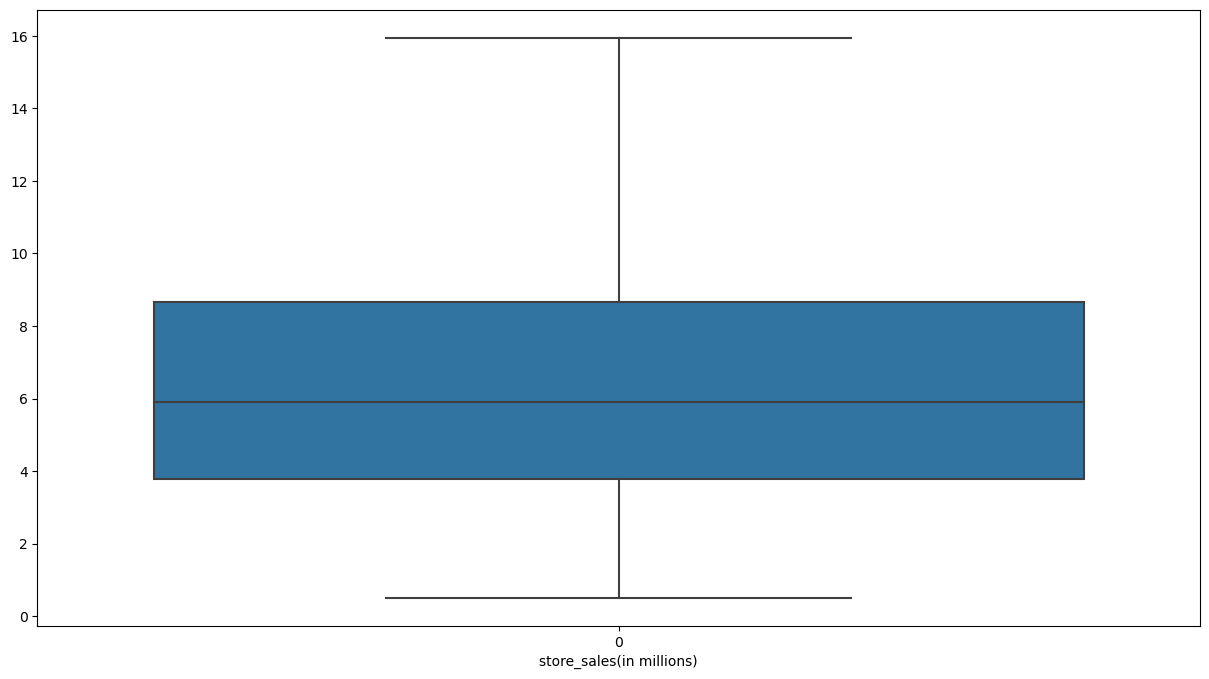

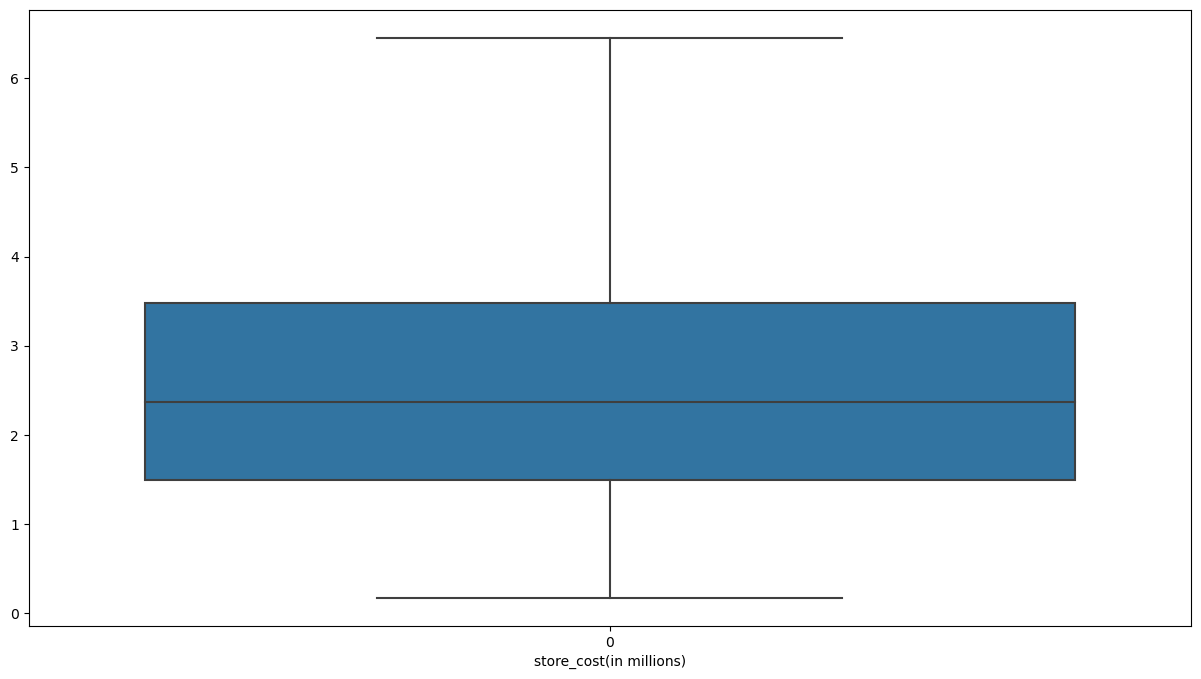

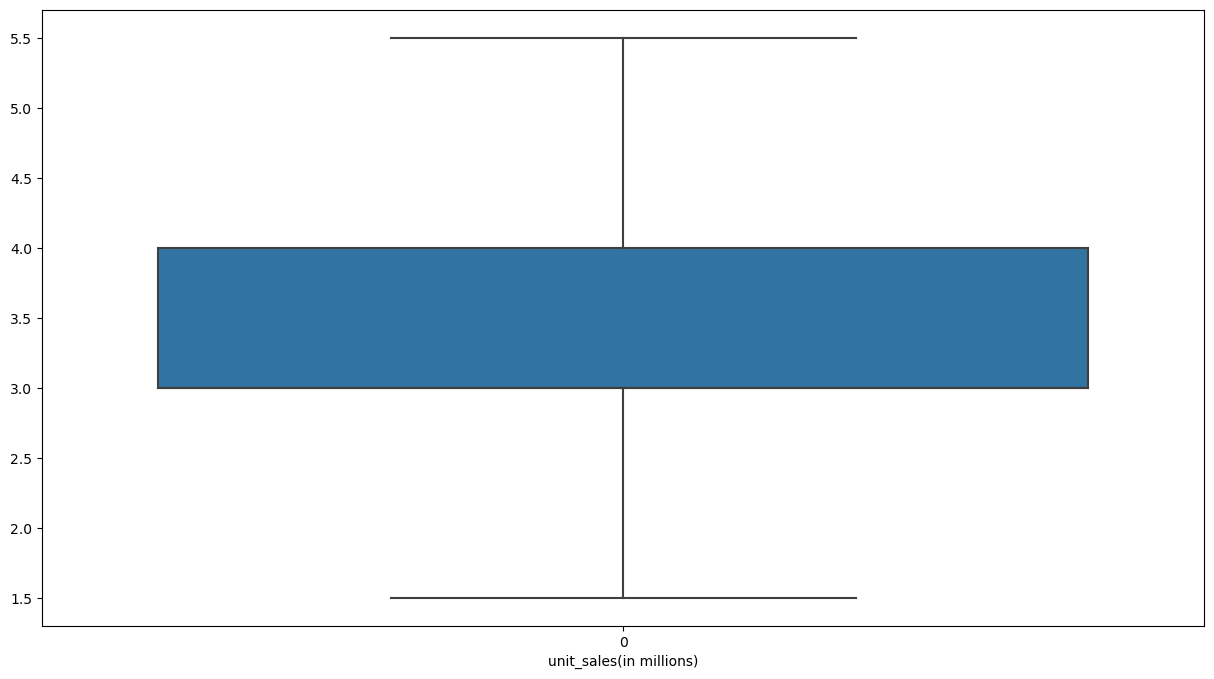

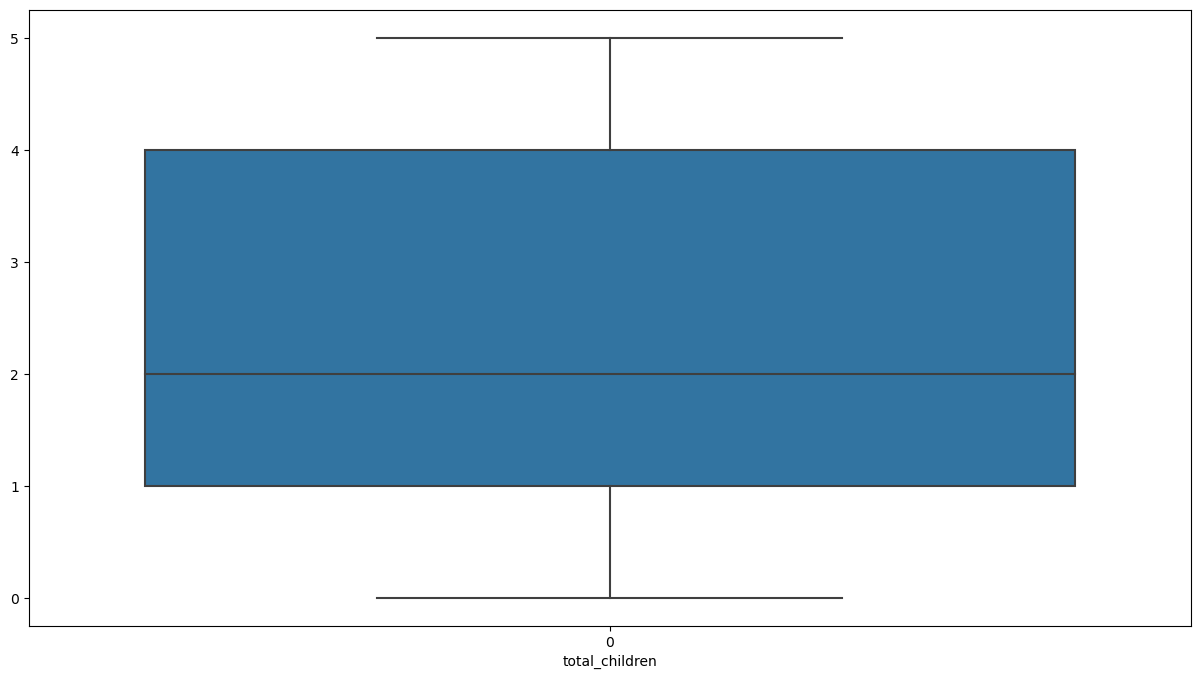

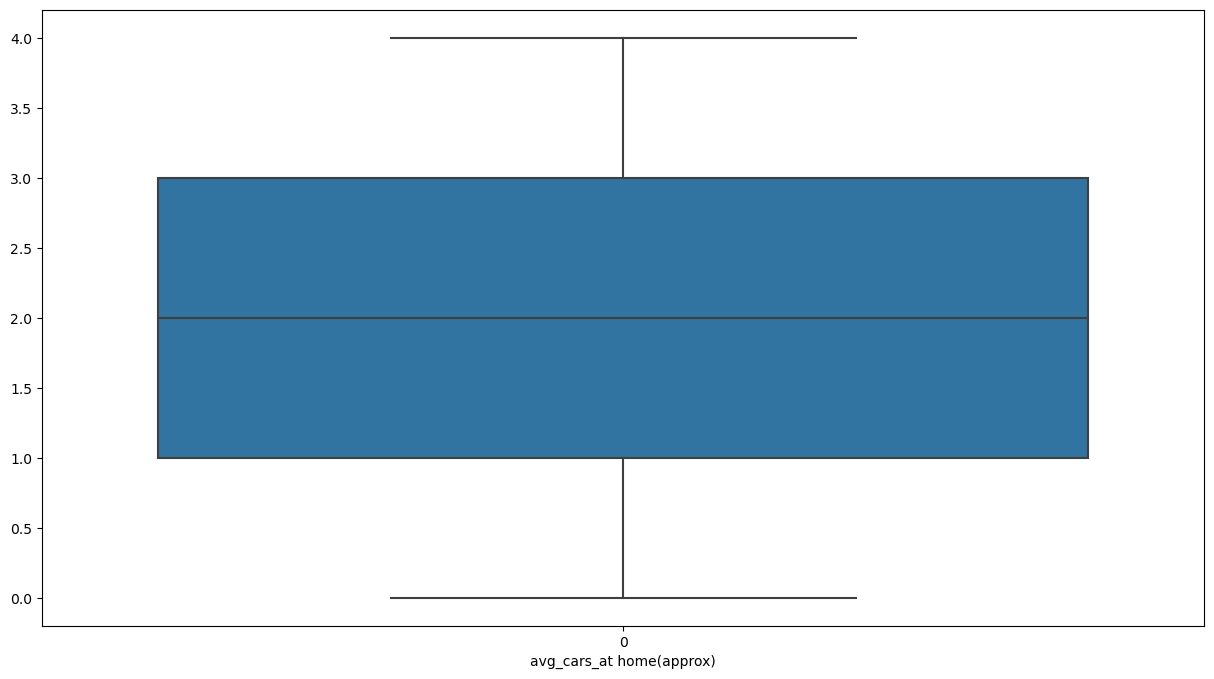

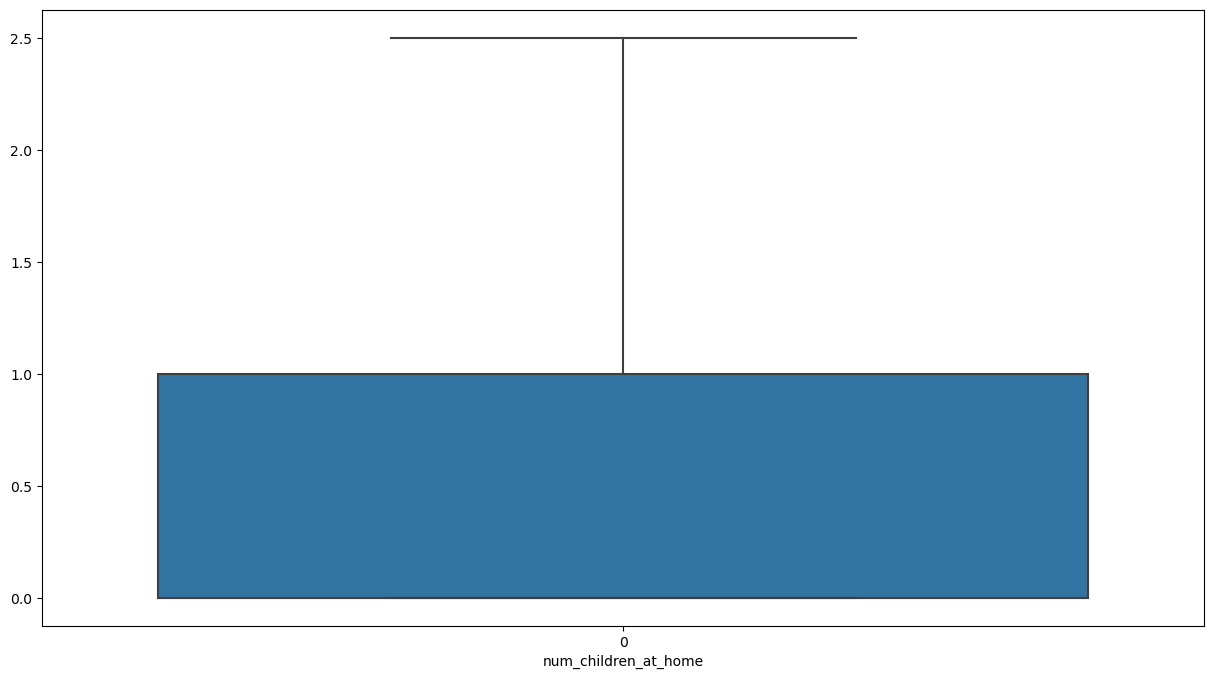

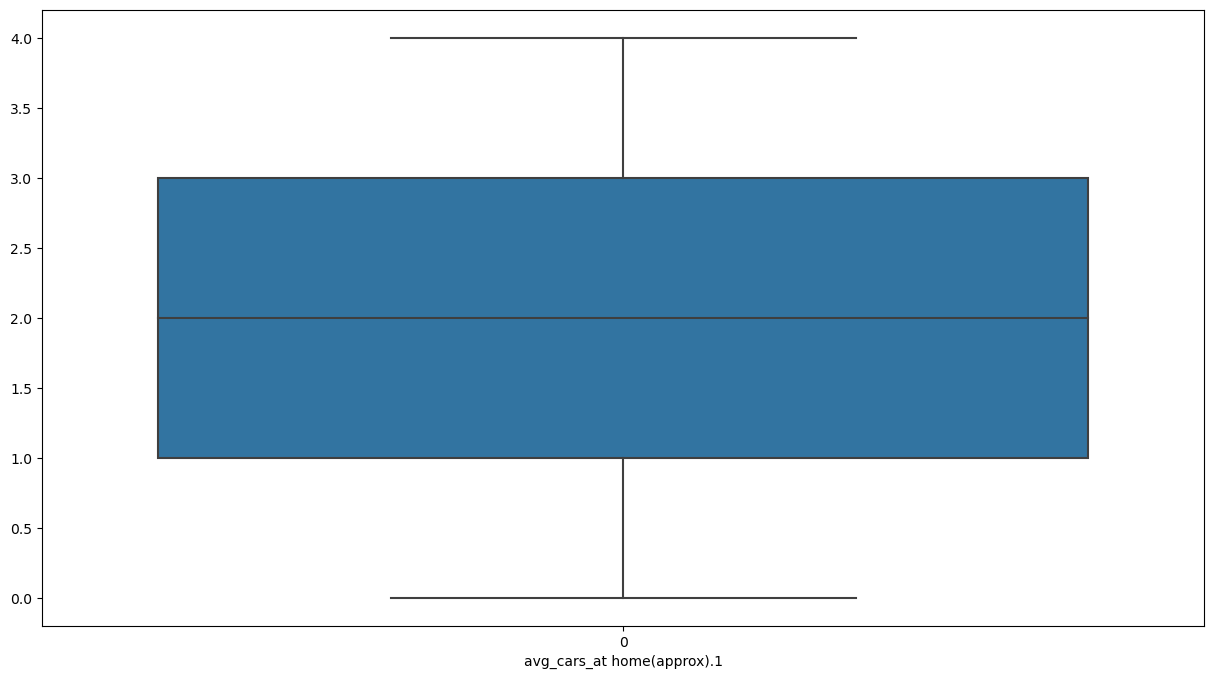

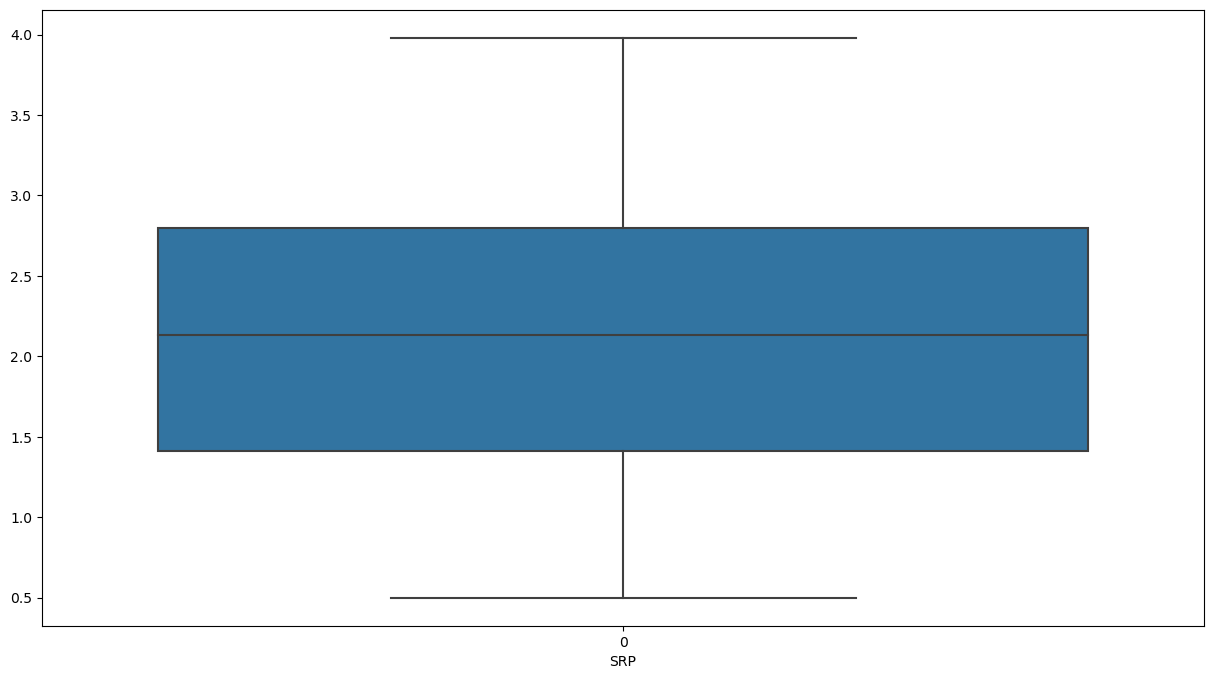

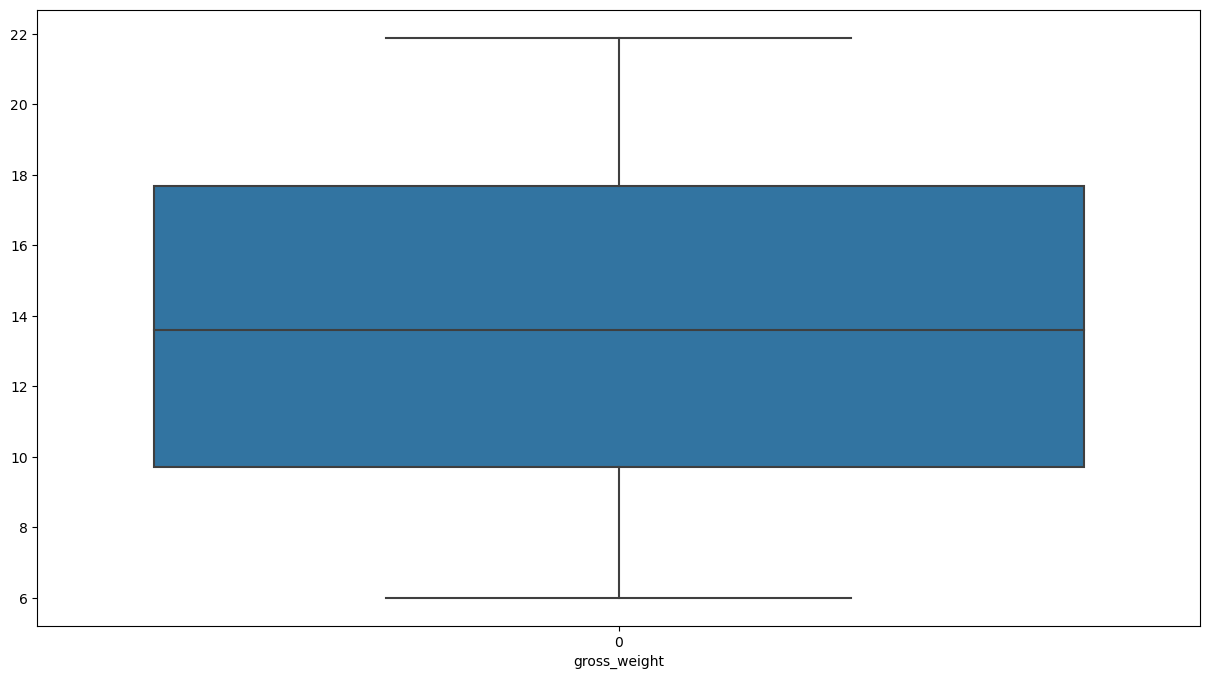

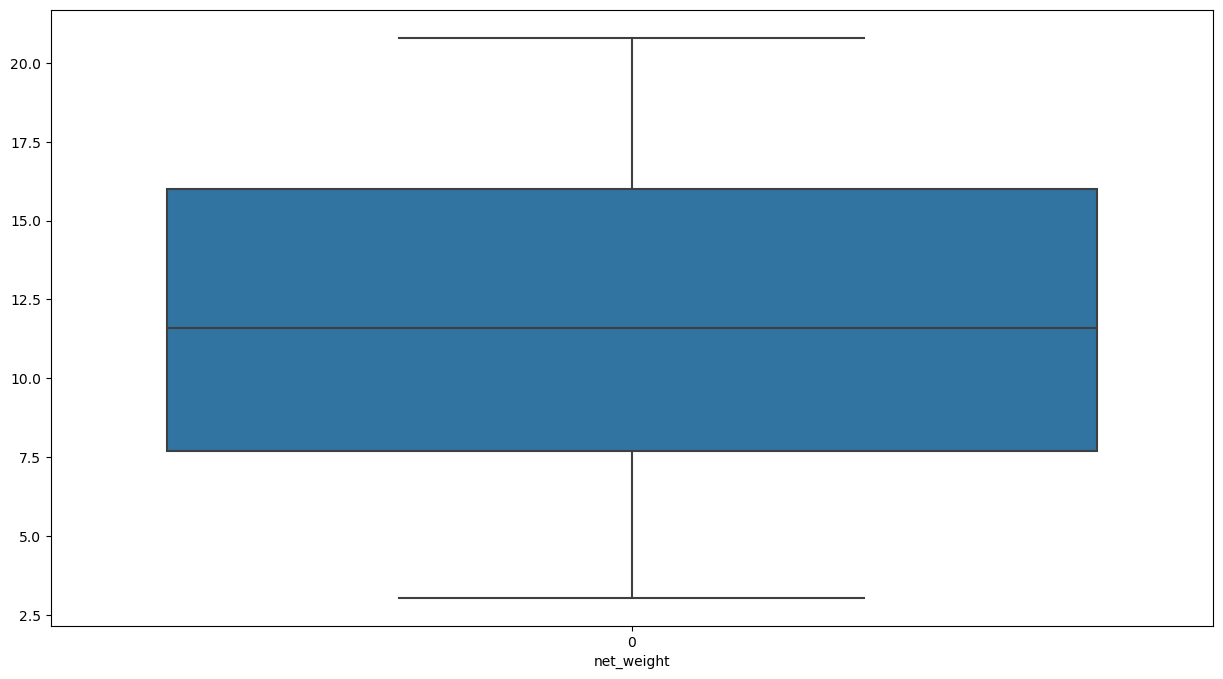

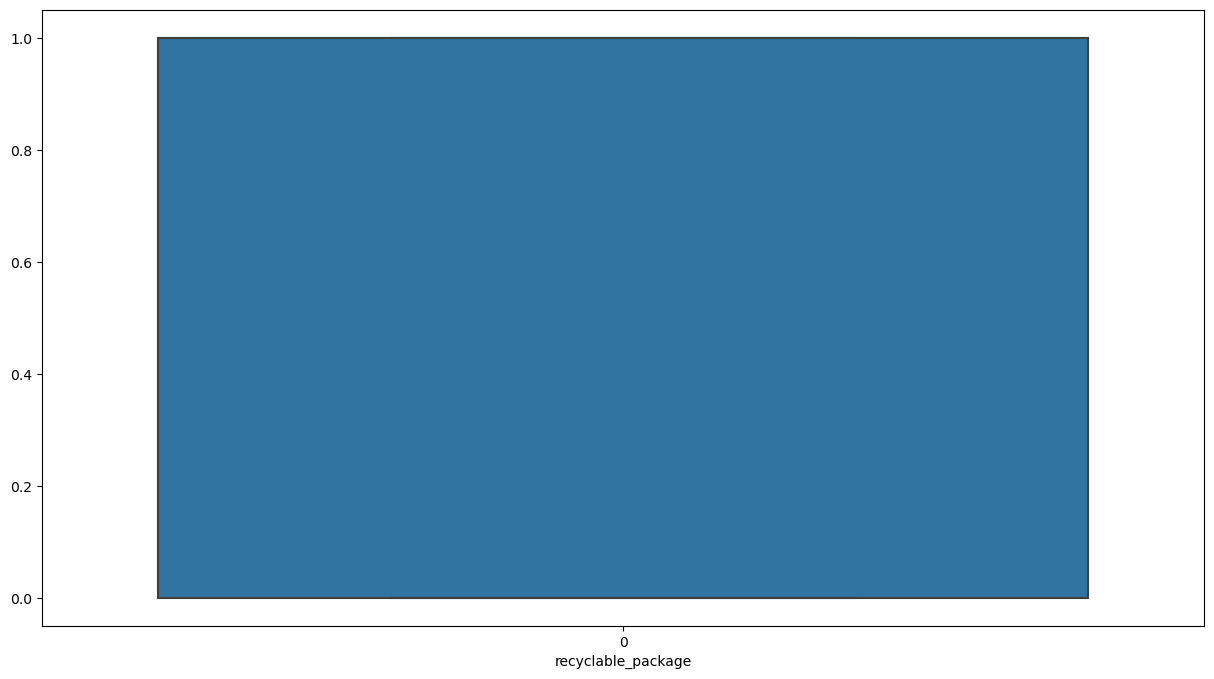

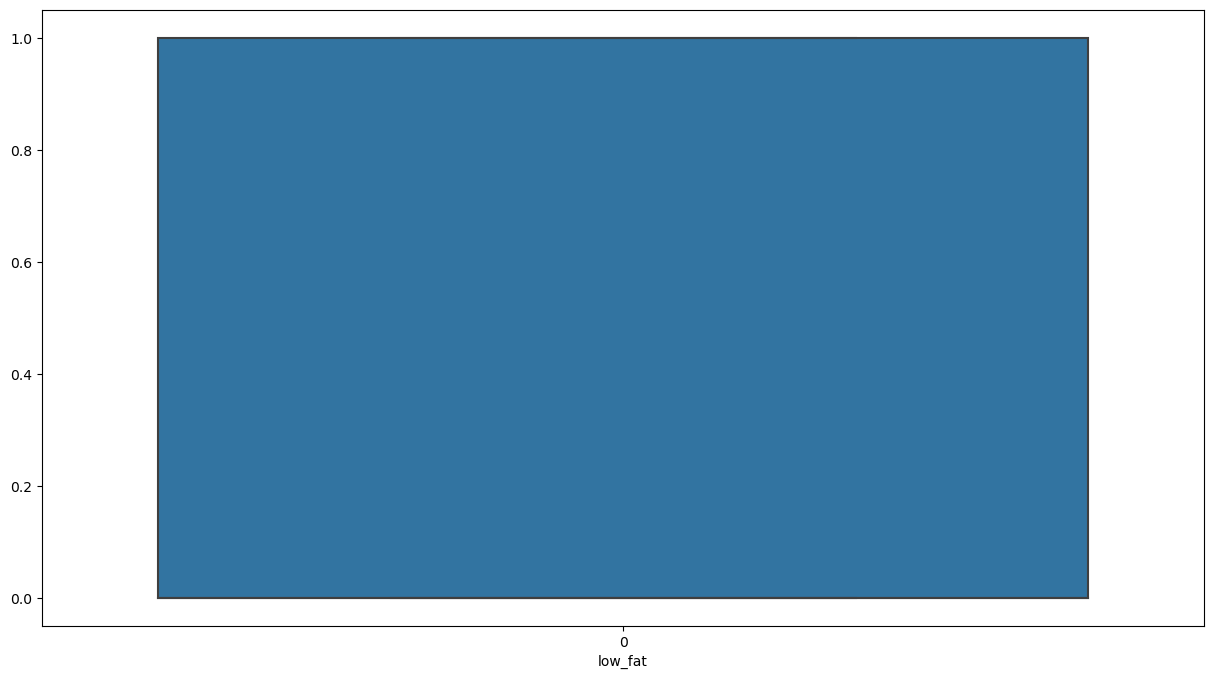

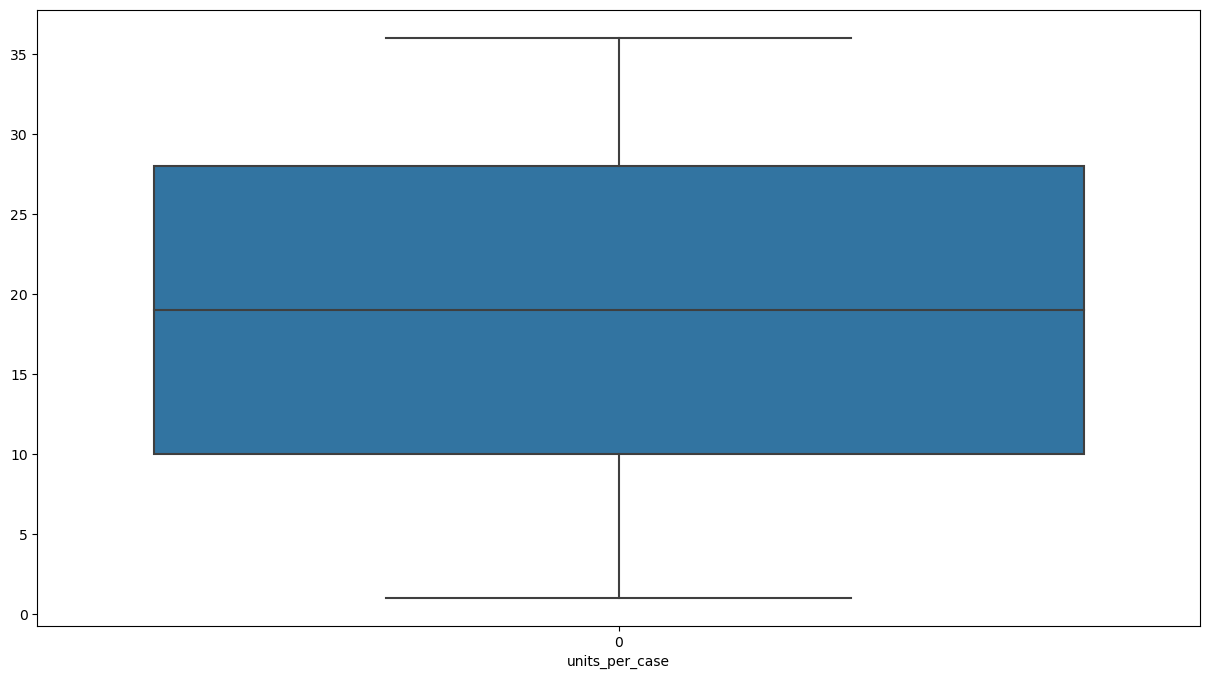

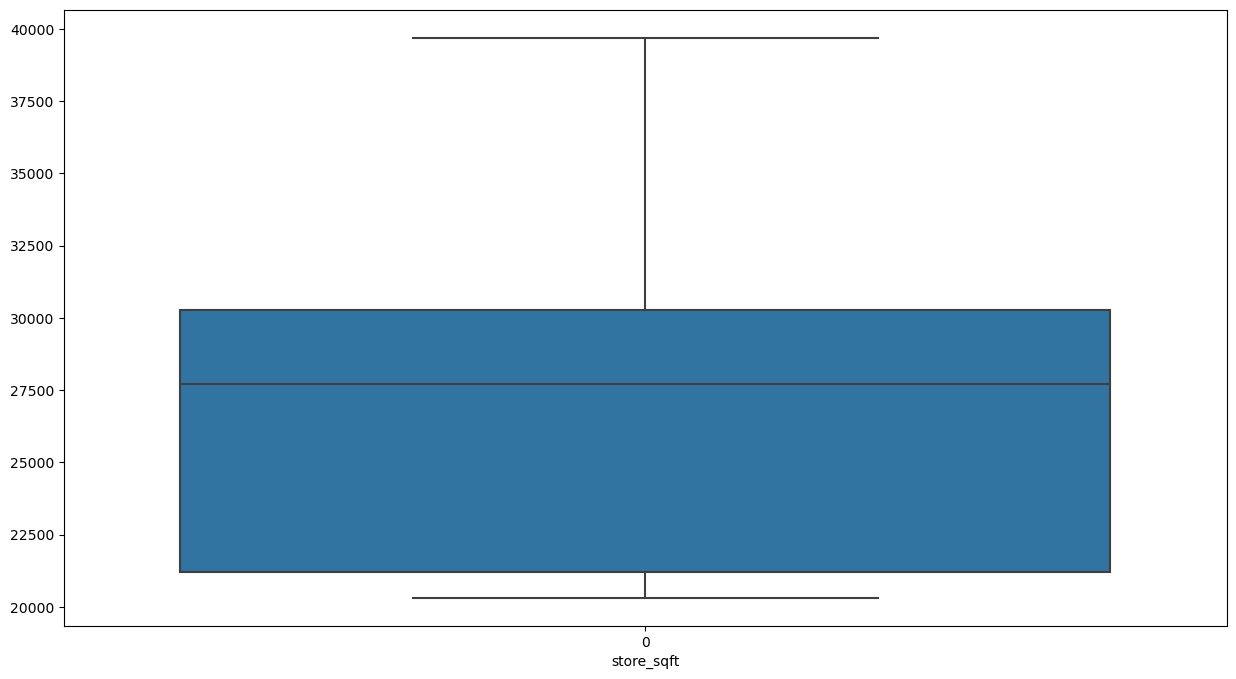

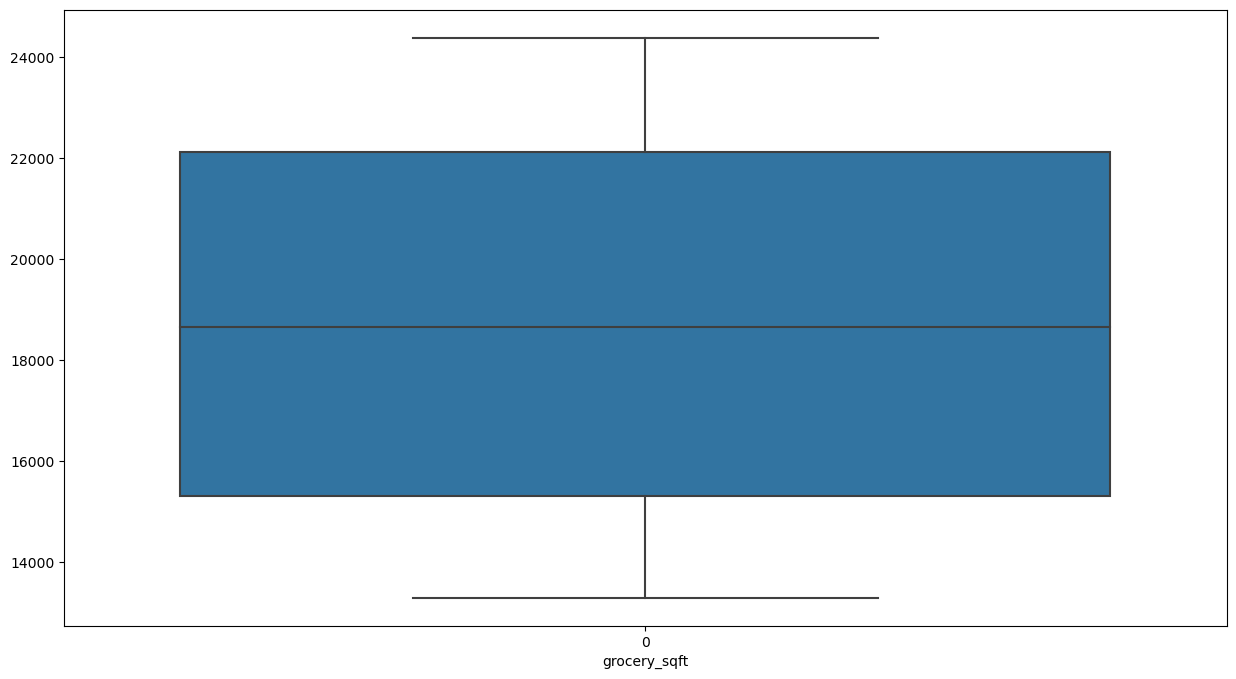

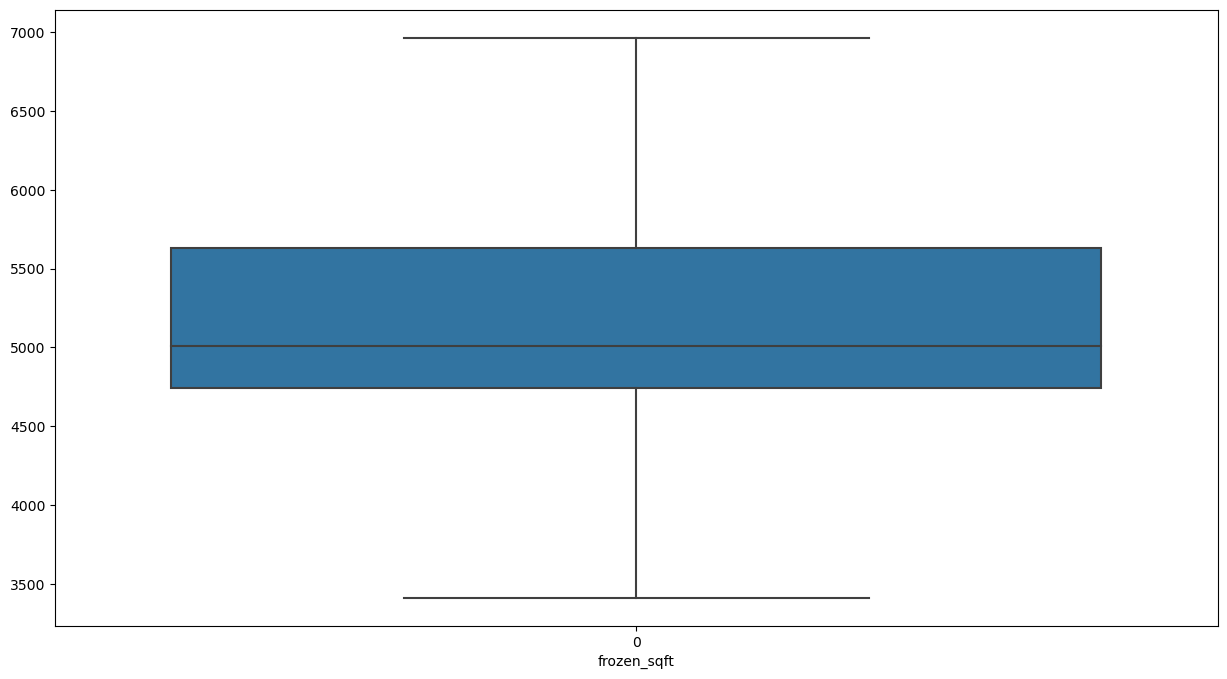

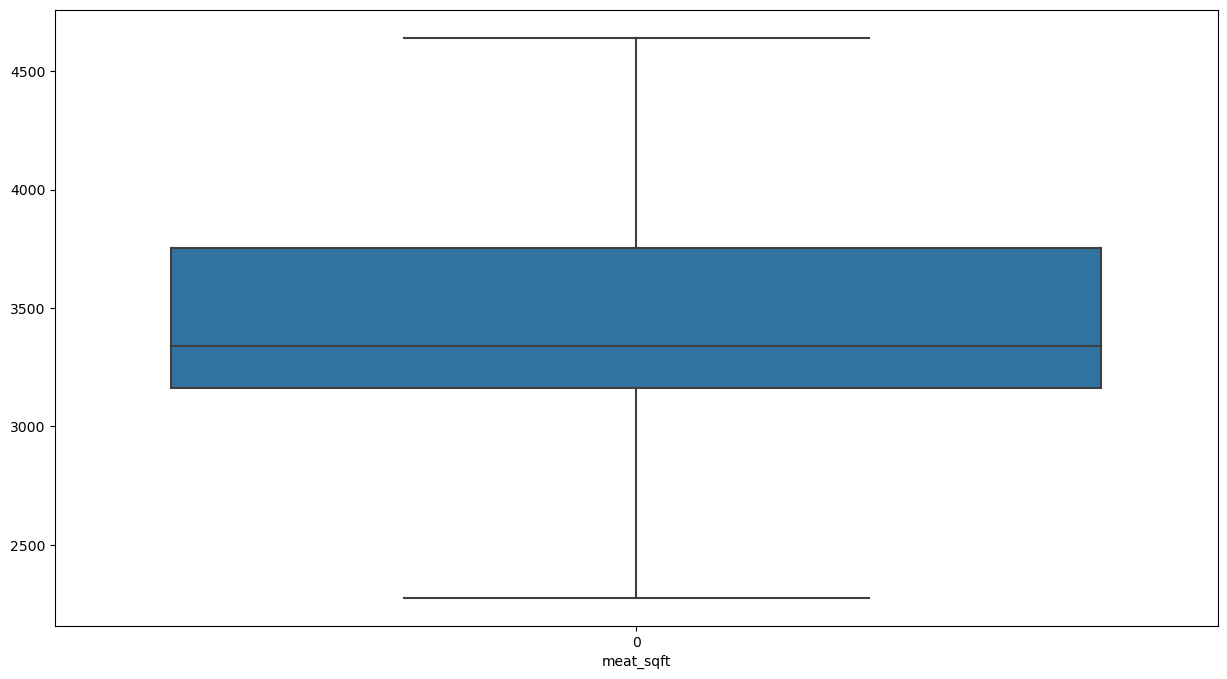

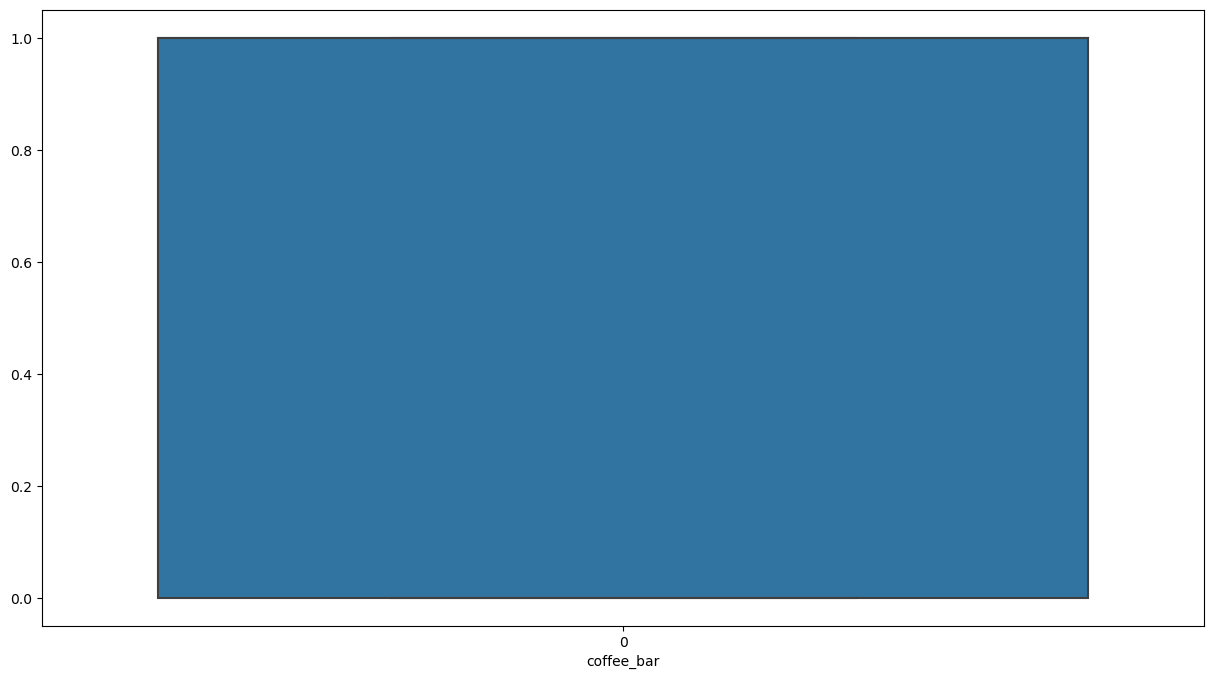

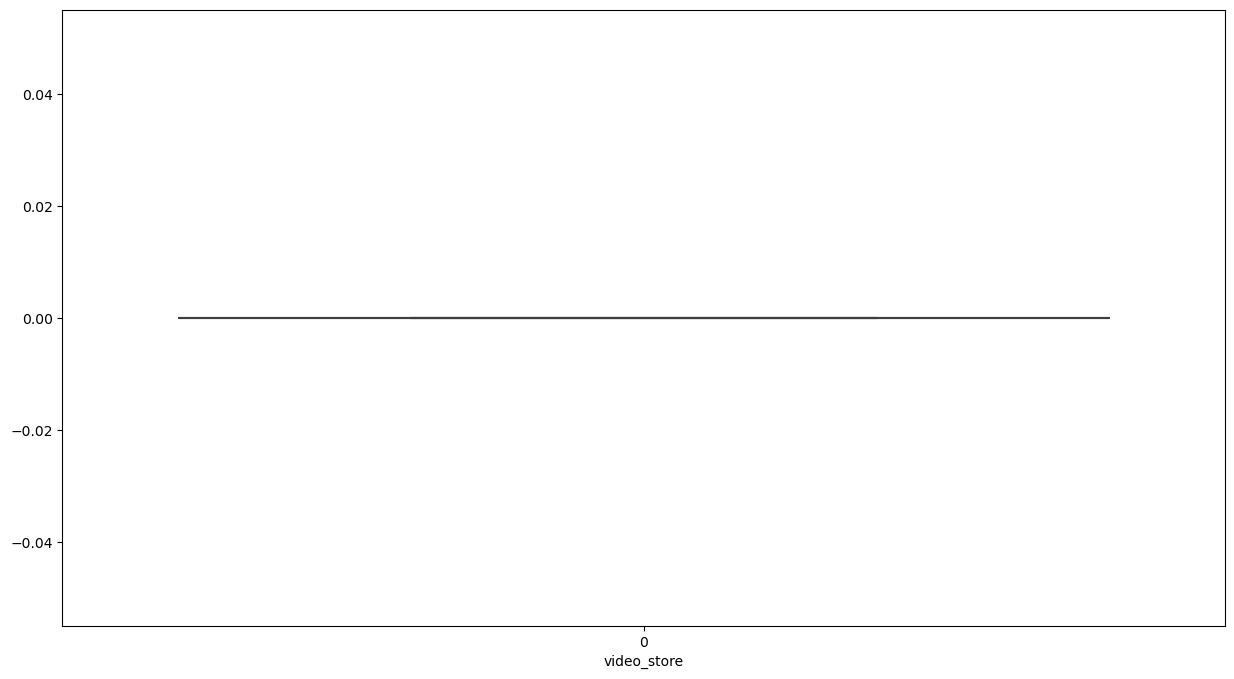

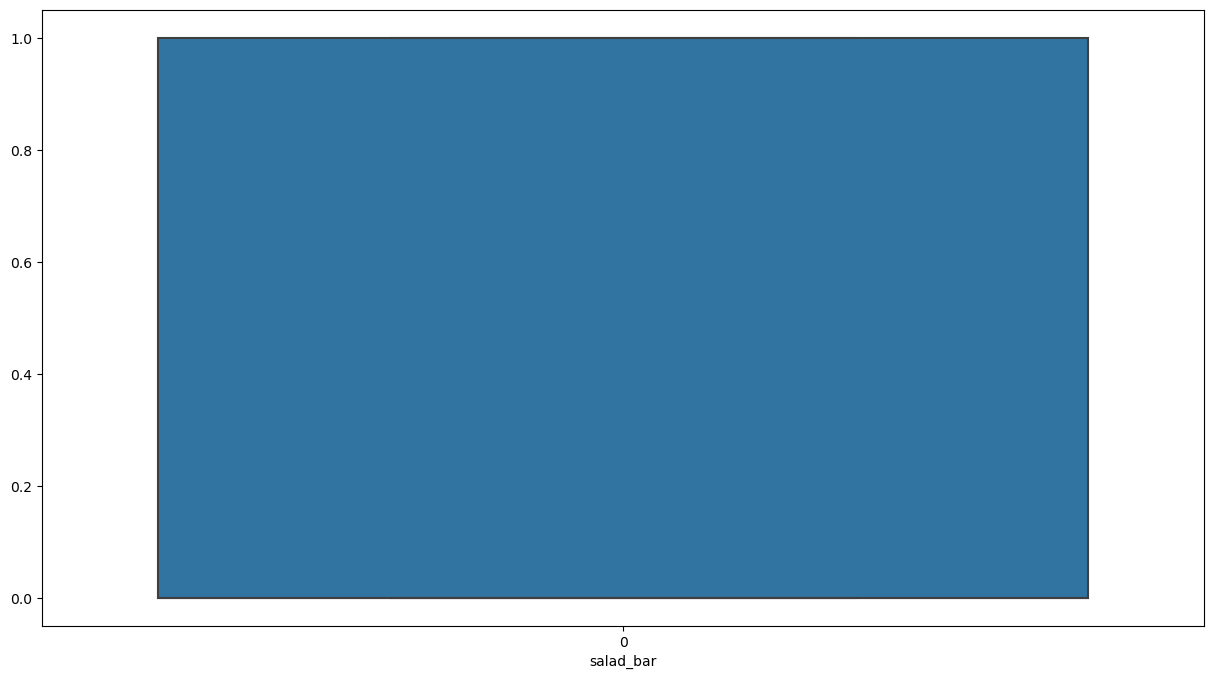

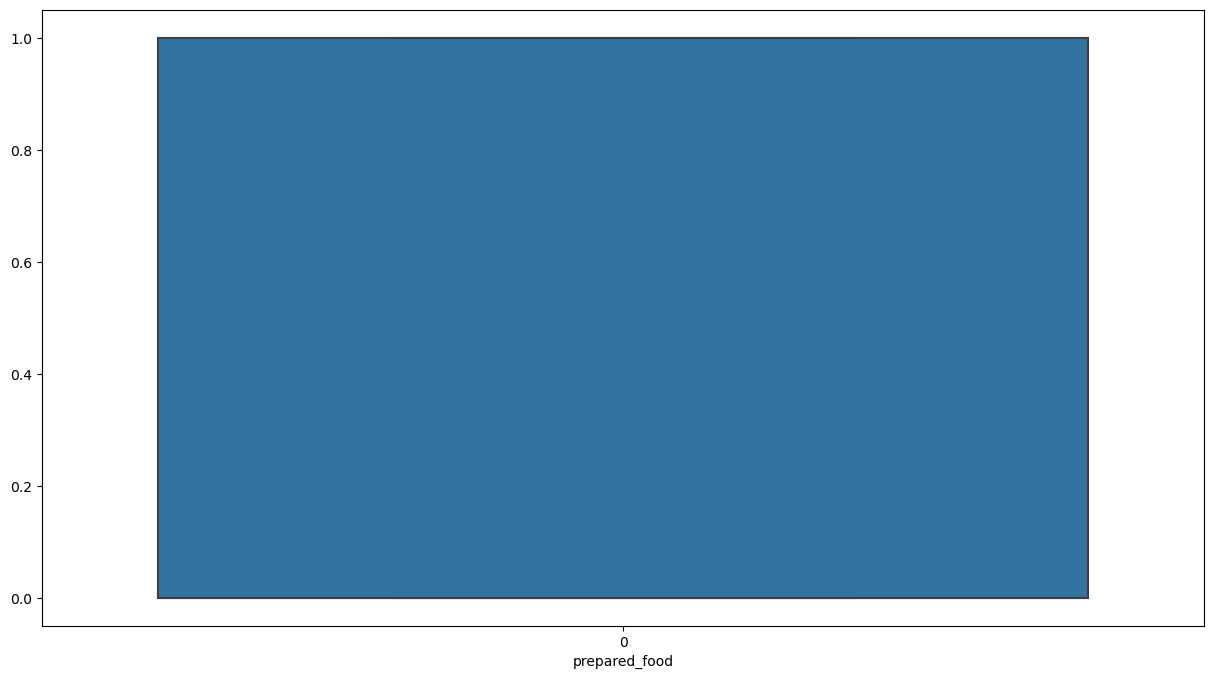

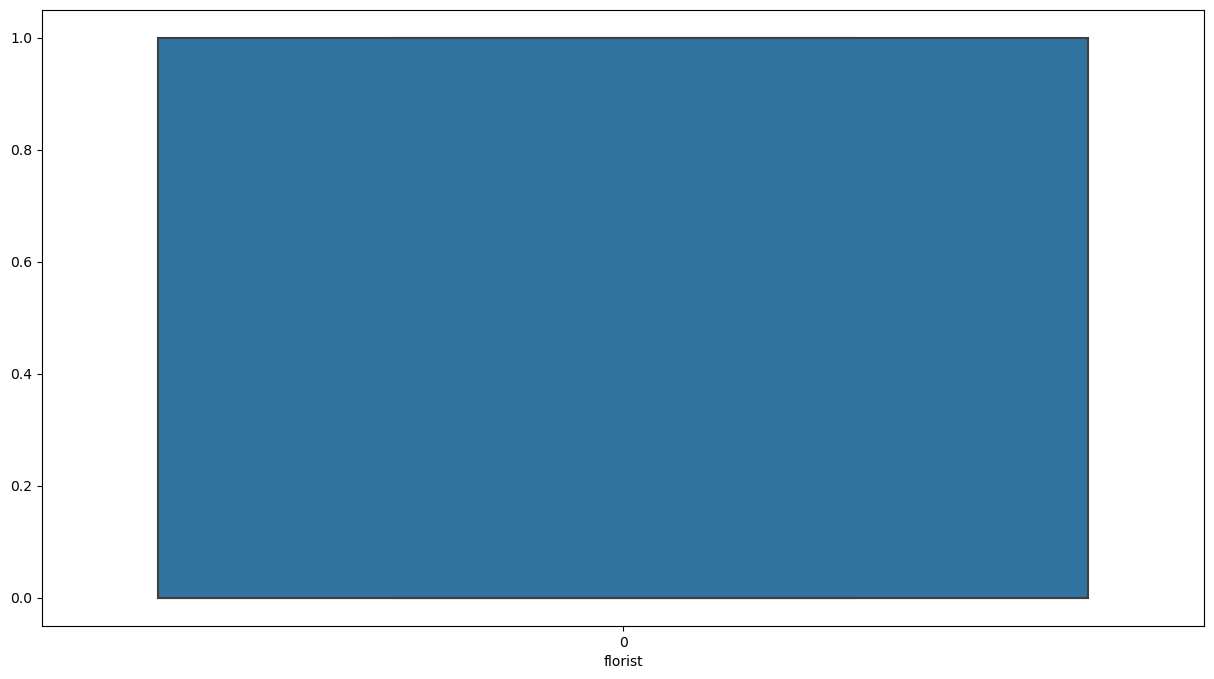

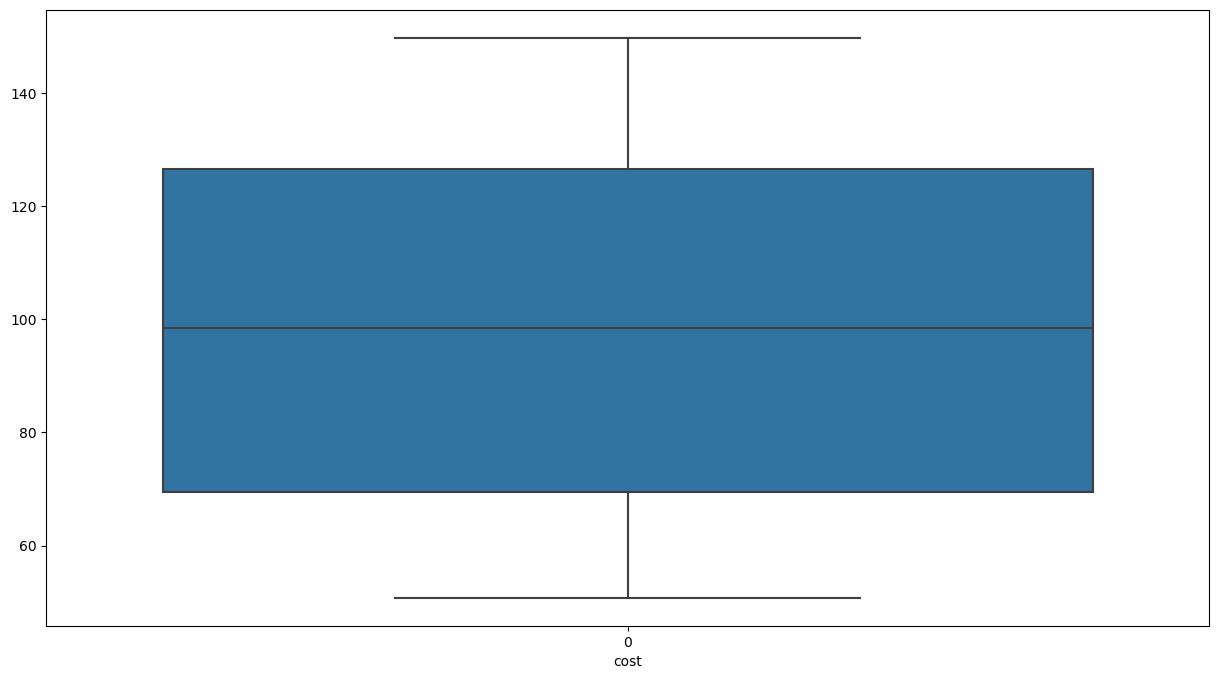

In [50]:
for col in usdata.select_dtypes(include=np.number).columns:
    sns.boxplot(usdata[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
usdata.shape

#### Encoding

In [51]:
usdata_encoded = pd.get_dummies(usdata,drop_first=True)

In [52]:
usdata_encoded.drop(columns=['Sa'])

KeyError: "['Sa'] not found in axis"

In [ ]:
fig , ax = plt.subplots(5,5,figsize = (19,10))
for col,subplots in zip(usdata.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(usdata[col],ax=subplots,kde=True)
    
plt.tight_layout()
plt.show()


In [ ]:
#Some features are skewed

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
X = usdata_encoded.drop('cost',axis=1)
y = usdata_encoded['cost']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [ ]:
model_boxcox=sma.OLS(stats.boxcox(Y_train)[0],X_train).fit()

In [ ]:

temp_X = sma.add_constant(X_train)

model_ols = sma.OLS(y_train,temp_X).fit()
model_ols.summary()

summary_text = model_ols.summary().as_text()

# Create a plot for the summary table (optional)
plt.figure(figsize=(30, 15))
plt.axis('off')
plt.text(0.1, 0.1, summary_text, fontsize=10)
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('ols_summary.png')

# Display the plot (optional)
plt.show()

